**Profitable App Profiles for the Google Play Market**

Below is an advanced analysis of apps that are availale in the Google Play Store and determined the profitable app profiles. Here I've used googleplaystore dataset available in kaggle ([click here](http://www.kaggle.com/lava18/google-play-store-apps)). The profitable app profile is determined by the features and attributes (category, genre, etc.) that attract more users to download or buy such app. The prime goal of an app to be in the Google Play Store is to have more users. I have determined why such app could attracts more users, what are the categories that attract people the most, what genres give more profit to the Google Play Store by attracting more users (or installers).

**Over View**
1. In the begining I've done preprocessing on the dataset to clean the data as the dataset has some problems which are mentioned below
    * Invalid entries
    * Duplicates & nan entries
    * Apps that target local people or specific communities or have language other than English are invalid and can cause more confusion in analysis.
    * Paid apps (We need only free apps because paid apps are more diverse and create more confusion because of the unique features)
2. After getting the cleaned dataset for the analysis, I've determined the features which are important for analysis because some features like current version, last update might not correlate with the feature like installs except for some exceptional cases.  (Category & Genres)
3. After getting features that are important for the analysis, analysing those features more deeply and determining entries that are more acceptable for our final answer which is to determine the entry or entries that attract more users (or that have more downloads).
4. After getting the answers of each features, I've determined the final answer which is the app profiles that are more profitable (attract more users).

**Part 1: Preprocessing on the dataset to clean the data and make it appropriate for further analysis**

In this part I've done preprocessing on the dataset to clean the data as the dataset has some problems which are mentioned below
* Invalid entries
* Duplicates & nan entries
* Apps that target local people or specific communities or have language other than English are invalid and can cause more confusion in analysis.
* Paid apps (We need only free apps because paid apps are more diverse and create more confusion because of the unique features)
The below are the steps to clean the dataset.

First we need to import libraries and set some parameters that are required for the analysis. Below is the code for that.

In [1]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import re # RegEx for string manipulaion
from matplotlib import rc
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from collections import Counter #for making frequency tables
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

rc('font', **font)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

google-play-store-apps



Loading the dataset: 

In [2]:
#loading data set
googleplaystore = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")
googleplaystore_user_reviews = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")

Let's take a look at our datasets.

In [3]:
print("Dataset: Google Play Store")
print("Columns: ", list(googleplaystore.columns))
print("Top five entries: \n", googleplaystore.head(5))
print("Total entries: ", len(googleplaystore))
print("\nDataset: Google Play Store user user reviews")
print("Columns: ", list(googleplaystore_user_reviews.columns))
print("Top five entries: \n", googleplaystore_user_reviews.head(5))
print("Total entries: ", len(googleplaystore_user_reviews))

Dataset: Google Play Store
Columns:  ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
Top five entries: 
                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   4.100   
1                                Coloring book moana  ART_AND_DESIGN   3.900   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   4.700   
3                              Sketch - Draw & Paint  ART_AND_DESIGN   4.500   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   4.300   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M

So we've got 10841 apps in googleplastore dataframe and 64295 reviews in the other dataframe. In this project we need only the first dataframe which is googleplaystore dataframe. Let's start our preprocessing.

Our first task is to remove invalid entries from the dataframe. I've seen in many discussions that there is an entry at index 10472 which is invalid, so let's check it out.

In [4]:
googleplaystore.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                             19.000
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Here we can see that this entry is invalid and can cause many errors in analysis, we don't need this entry so I am droping it out.

In [5]:
googleplaystore = googleplaystore.drop(index = 10472)

Our second task is to find duplicates in the dataframe. First let's check how many duplicates of 'Instagram' exists.

In [6]:
for app_id in range(len(googleplaystore)):
    name = googleplaystore.iloc[app_id][0]
    if name == 'Instagram':
        print(googleplaystore.iloc[app_id])

App                        Instagram
Category                      SOCIAL
Rating                         4.500
Reviews                     66577313
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2545, dtype: object
App                        Instagram
Category                      SOCIAL
Rating                         4.500
Reviews                     66577446
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2604, 

Here 'Instagram' has got four duplicate entries, not completely duplictes but number of reviews are different except for the name. Those entries might be taken in different time periods but here we don't need all of them. So we need to decide which entry should be taken for analysis and removing others. From the example of the app 'Instagram' we can see that number of reviews may change in each and every duplicate. As more reviews implies more accuracy (excluding exceptional cases), I've selected the most reviewed entry. Below is the code to determine app with maximum reviewed entry which is a dictionary named as reviws_max (app name - highest number of reviews -> key-value pair).

In [7]:
reviews_max = {}

for app_id in range(len(googleplaystore)):
    app = googleplaystore.iloc[app_id]
    name = app[0]
    n_reviews = float(app[3])

    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews

    elif name not in reviews_max:
        reviews_max[name] = n_reviews

Let's check the first ten entries of reviews_max dictionary.

In [8]:
[(i, reviews_max[i]) for i in list(reviews_max.keys())[:10]]

[('Photo Editor & Candy Camera & Grid & ScrapBook', 159.0),
 ('Coloring book moana', 974.0),
 ('U Launcher Lite – FREE Live Cool Themes, Hide Apps', 87510.0),
 ('Sketch - Draw & Paint', 215644.0),
 ('Pixel Draw - Number Art Coloring Book', 967.0),
 ('Paper flowers instructions', 167.0),
 ('Smoke Effect Photo Maker - Smoke Editor', 178.0),
 ('Infinite Painter', 36815.0),
 ('Garden Coloring Book', 13791.0),
 ('Kids Paint Free - Drawing Fun', 121.0)]

Let's check how may duplicates we've got.

In [9]:
print("Length of reviews_max dict: ", len(reviews_max))
print("Total number of duplicate entries:", len(googleplaystore) - len(reviews_max))

Length of reviews_max dict:  9659
Total number of duplicate entries: 1181


Now let's clean the dataset by creating a new list of most reviewed entries of an app. Here some complete duplicates with the same reviews may exist, so we need to keep track of which apps we've already added, now if a duplicate comes then we can ignore (or exclude) that. Below is the code for removing duplicates using reviews_max dictionary and storing it in googlplaystore_clean list.

In [10]:
googleplaystore_clean = []
already_added = []

for app_id in range(len(googleplaystore)):
    app = googleplaystore.iloc[app_id]
    name = app[0]
    n_reviews = float(app[3])

    if (reviews_max[name] == n_reviews) and (name not in already_added):
        googleplaystore_clean.append(app)
        already_added.append(name)

We've got a new list of apps (named googleplaystore_clean) after removing duplicates, lets check its size.

In [11]:
len(googleplaystore_clean)

9659

For handling nan values we need to explore the dataset and it is done in later part.

Our third task is to remove apps that target local people or specific communities or have language other than English. Because they can cause more confusion in the analysis. This task can easily be done if we remove apps that are in languages other than English because most of the apps that target specific community have the name in the local language. Below are the examples of such apps

In [12]:
print(googleplaystore_clean[529][0])
print(googleplaystore_clean[1206][0])
print(googleplaystore_clean[3279][0])
print(googleplaystore_clean[4412][0])

Flame - درب عقلك يوميا
သိင်္ Astrology - Min Thein Kha BayDin
L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰, 롯데]
中国語 AQリスニング


These apps are not in english language and tell us that these apps are ment to be for some specific people or communities. These needs to be removed from our dataframe. Below is the function (is_English) to detect whether the give string is in english or not. This function will return false if the string has more than three non english characters (Emojis, characters from languages other than english) and true elsewhere.

In [13]:
def is_English(string):
    non_ascii = 0

    for character in string:
        if ord(character) > 127:
            non_ascii += 1

    if non_ascii > 3:
        return False
    else:
        return True

print(is_English('Docs To Go™ Free Office Suite'))
print(is_English('Instachat <img draggable="false" class="emoji" alt="<img draggable="false" class="emoji" alt="<img draggable="false" class="emoji" alt="<img class="emoji" alt="😜" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">'))
print(is_English('中国語 AQリスニング'))

True
True
False


Using the function above, I've created a new list of apps that are in english language. If the name passed to the is_English return true then we include it in the list.

In [14]:
googleplaystore_english = []


### android ###
for app in googleplaystore_clean:
    name = app[0]
    if is_English(name):
        googleplaystore_english.append(app)


Here googleplaystore_english list is the list of all the apps that are in english language.

Our fourth task is to remove paid apps as paid apps are more diverse and create more confusion because of their unique features which are not described in the dataset. Below is the code for selecting the apps which are free. googleplaystore_final list contains the apps that are free.

In [15]:
### These two lists will store the new data sets ###
googleplaystore_final = []

### android ###
for app in googleplaystore_english:
    price = app[7]
    if price == '0':
        googleplaystore_final.append(app)

### Checking number of entries left ###
print(len(googleplaystore_final))

8864


Now this is the end of preprocessing and we have got a list of entries which are appropriate for the analysis. Now we need to convert that list into a dataframe for further use.

In [16]:
train = pd.DataFrame(googleplaystore_final, columns = googleplaystore.columns)

After converting it into a dataframe, we don't need 'Price' column so I am droping it. Here, reviews columns datatype is object instead of int so converting it into 

In [17]:
train.drop('Price', axis=1, inplace=True)

In [18]:
train[["Reviews"]] = train[["Reviews"]].astype(np.int32)

Now our final task is to handle nan data. Let's see the columns header first.

In [19]:
train.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Here we can see that App, Category, Installs, content rating, Genres, Last Updated, Current Ver, Android version and size will be in string format. So let's see the discription of the whole dataset.

In [20]:
train.describe(include =['object', 'float', 'int32'] )

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8864,8864,7566.000,8864.000,8864,8864,8863,8864,8864,8864,8858,8863
unique,8864,33,nan,nan,406,21,1,6,114,1273,2696,33
top,EZ Wifi Notification,FAMILY,nan,nan,Varies with device,"1,000,000+",Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1676,nan,nan,1155,1394,8863,7218,749,242,989,2075
mean,NaN,NaN,4.166,235466.428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.534,1910517.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000,30.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300,1403.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500,35528.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


let's see the discription of the columns that are numbers or floats.

In [21]:
train.describe(include =['float', 'int32'] )

,Rating,Reviews
count,7566.000,8864.000
mean,4.166,235466.428
std,0.534,1910517.227
min,1.000,0.000
25%,4.000,30.000
50%,4.300,1403.000
75%,4.500,35528.500
max,5.000,78158306.000


let's see the discription of the columns that are objects (strings).

In [22]:
train.describe(include =['object'] )

,App,Category,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8864,8864,8864,8864,8863,8864,8864,8864,8858,8863
unique,8864,33,406,21,1,6,114,1273,2696,33
top,EZ Wifi Notification,FAMILY,Varies with device,"1,000,000+",Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1676,1155,1394,8863,7218,749,242,989,2075


**From the give discription we can determine most common apps by category as well as genres.
Most common apps by category are the apps with "FAMILY" category (1676 apps) and most common apps by the genre are the apps with "Tools" as genre (749 apps).**

**Part 2:**
Part 2 is to determine the features which are important for analysis because some features like current version, last update might not correlate with the feature like installs except for some exceptional cases. Here from the columns we can see that rating, reviews, content rating, category and genre are the features that are important for analysis. Out of these reviews, content rating and ratings are too obvious, more rated and good reviewed and appropriate content rating app will get more installers. There are a few exceptions for example, we can see in the first five entry that app id two has more rating than app id three. (But reviews are more in app id 3 than app id 2. Some of the app's internal features also matters in counting their effectiveness for getting more users. And from the name it can be justified) So here I've decide 'Category' and 'Genres' features for our analysis. So our profitable app profiles will be consisting categories and genres only.

**Part 3:** Analysing features more deeply and determining entries that are more acceptable for our final answer which is to determine the entry or entries that attract more users (or that have more downloads).
Here we have two features to analyze i.e. category and genres.

**Part A:** Analysis of Categories (Effect of Categories on Installers)

Below is the code for finding what entries which are in 'Installs' column and 'Category' column

In [23]:
Installs_set = list(set(train['Installs']))
Installs_set

['1,000,000,000+',
 '100,000,000+',
 '500+',
 '1+',
 '10+',
 '10,000,000+',
 '500,000,000+',
 '10,000+',
 '100,000+',
 '5,000+',
 '50+',
 '100+',
 '0+',
 '1,000,000+',
 '500,000+',
 '50,000+',
 '5+',
 '50,000,000+',
 '1,000+',
 '5,000,000+',
 '0']

In [24]:
'''
How to get Category_set:
Category_set = list(set(train['Category']))
#Due to change of hashing keys of set indeces, the output list is changing. 
'''
Category_set =  ['PRODUCTIVITY',
                 'SPORTS',
                 'LIFESTYLE',
                 'FOOD_AND_DRINK',
                 'NEWS_AND_MAGAZINES',
                 'HOUSE_AND_HOME',
                 'GAME',
                 'COMMUNICATION',
                 'HEALTH_AND_FITNESS',
                 'ENTERTAINMENT',
                 'BEAUTY',
                 'WEATHER',
                 'AUTO_AND_VEHICLES',
                 'SOCIAL',
                 'EVENTS',
                 'BUSINESS',
                 'SHOPPING',
                 'TOOLS',
                 'PARENTING',
                 'COMICS',
                 'BOOKS_AND_REFERENCE',
                 'MEDICAL',
                 'PHOTOGRAPHY',
                 'VIDEO_PLAYERS',
                 'ART_AND_DESIGN',
                 'FINANCE',
                 'FAMILY',
                 'PERSONALIZATION',
                 'TRAVEL_AND_LOCAL',
                 'EDUCATION',
                 'MAPS_AND_NAVIGATION',
                 'DATING',
                 'LIBRARIES_AND_DEMO']

**Most common apps by Category:**

From the description of 'Category' column we can see that the most common apps by Category is "FAMILY", below is the code for ploting category and the number of apps belong to that category.

First let's make a frequency table.

In [25]:
freq_counter = dict(Counter(train["Category"]))
freq_counter_pair = list(zip(freq_counter.keys(), freq_counter.values()))
freq_counter_pair.sort(key=lambda x: x[1], reverse = True)
x = []
y = []
Category_set_ = []
i = 0
for x_, y_ in freq_counter_pair:
    x.append(i)
    i += 1
    Category_set_.append(x_)
    y.append(y_)
freq_table = pd.DataFrame(columns=["Category", "Number of apps"])
freq_table["Category"] = Category_set_
freq_table["Number of apps"] = y
freq_table

,Category,Number of apps
0,FAMILY,1676
1,GAME,862
2,TOOLS,750
3,BUSINESS,407
4,LIFESTYLE,346
5,PRODUCTIVITY,345
6,FINANCE,328
7,MEDICAL,313
8,SPORTS,301
9,PERSONALIZATION,294


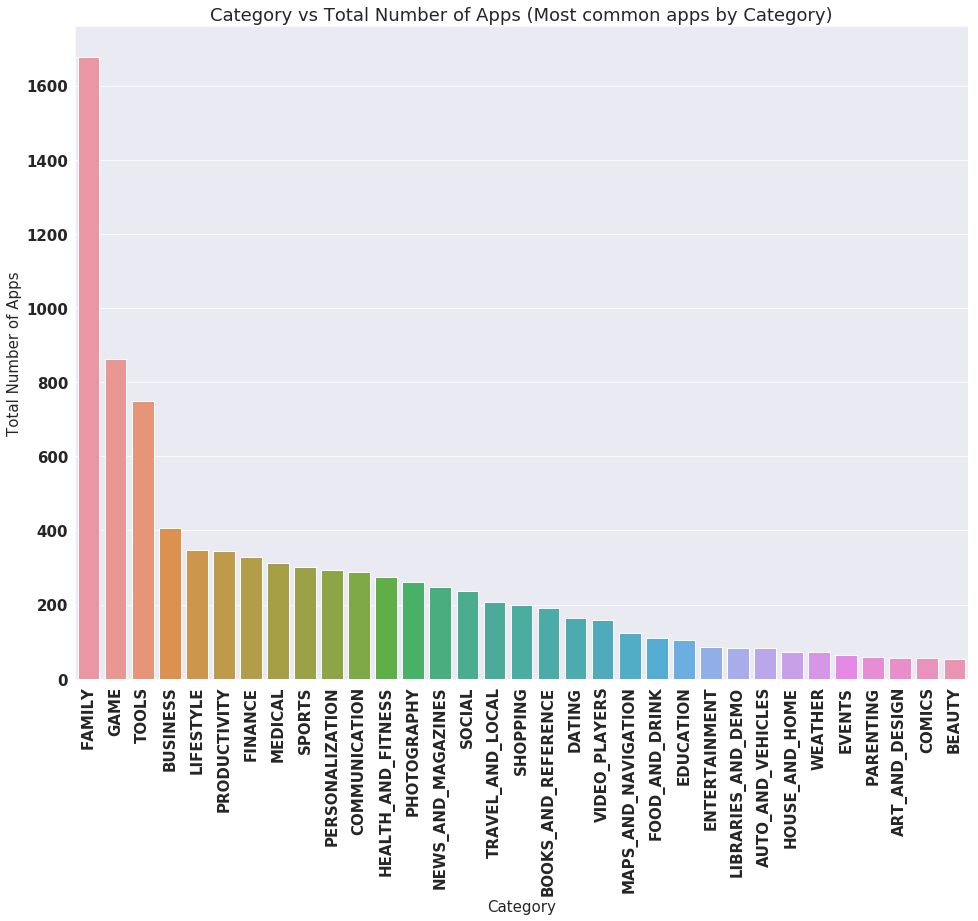

In [26]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

rc('font', **font)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.barplot(x=x, y=y)
ax.title.set_text("Category vs Total Number of Apps (Most common apps by Category)")
ax.set_xlabel("Category")
ax.set_ylabel("Total Number of Apps")
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Category_set)), Category_set_)
print()

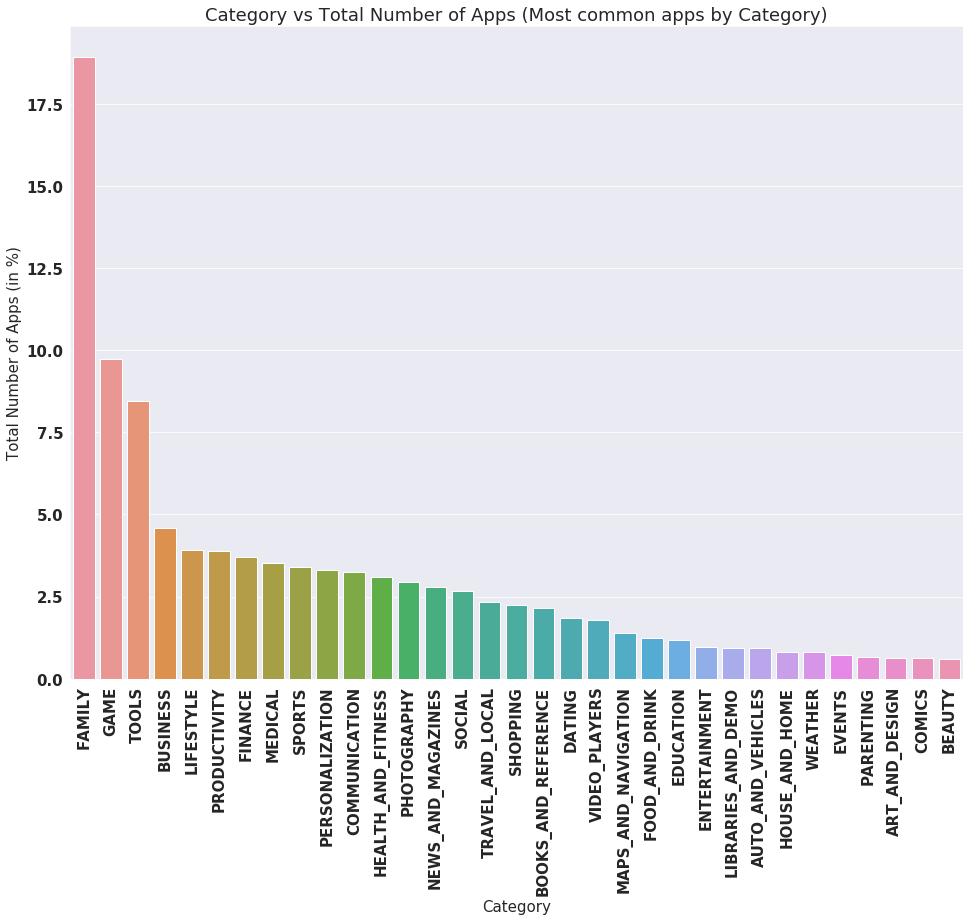

In [27]:
# xs and ys were created above and using it here
y_tmp = []
for i in y:
    y_tmp.append(i/len(train)*100)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.barplot(x=x, y=y_tmp)
ax.title.set_text("Category vs Total Number of Apps (Most common apps by Category)")
ax.set_xlabel("Category")
ax.set_ylabel("Total Number of Apps (in %)")
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Category_set)), Category_set_)
print()

**Most popular apps by Category:**

For that we need to plot bargraph between 'Installs' (y) and 'Category' (x). But as we can see that installs are not numeric values. So I've converted it into numberic values e.g. "1,000,000+" => 1000000.00 , because it says that the value is greater than 1Million but that can be one less than the next largest one, so for simplicity we are converting it into their respective floats.
Below is the code for  ploting category vs average number of installers.

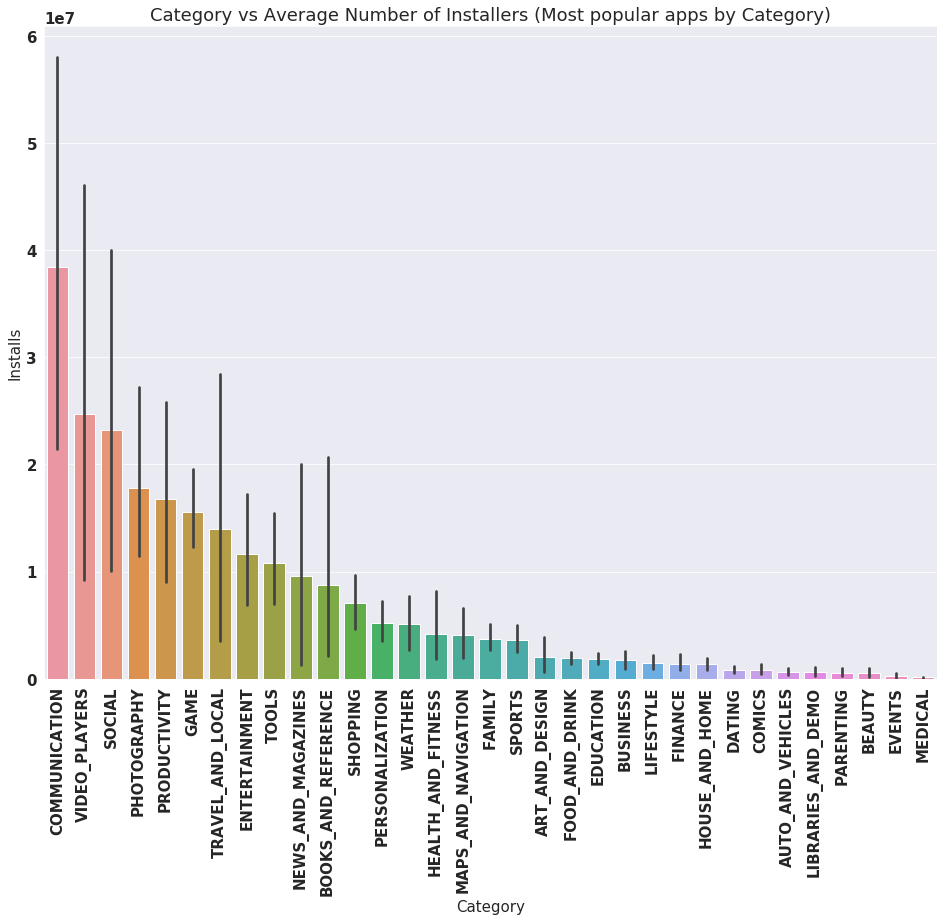

In [28]:
var = 'Category'
data = pd.concat([train['Installs'].map(lambda x:float(re.sub('[,+]', '', x))), train[var].map(lambda x: Category_set.index(x))], axis=1)
result = data.groupby(["Category"])['Installs'].aggregate(np.mean).reset_index().sort_values('Installs', ascending=False)
new_mapping = list(result['Category'])
new_list = []
for i in data['Category']:
    new_list.append(new_mapping.index(i))
data['Category'] = new_list
Category_set_ = []
for i in new_mapping:
    Category_set_.append(Category_set[i])
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.barplot(x=var, y="Installs", data=data)
ax.title.set_text("Category vs Average Number of Installers (Most popular apps by Category)")
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Category_set)), Category_set_)
print()

Here we can see that the most popular apps by category are the apps with "COMMUNICATION" because the 7th entry shows the installs of apps which are in category "COMMUNICATION". So let's check their top market holders. Below is the code to get apps which are in "COMMNUNICATION" category and have more than 1 Billion installers.

In [29]:
var = Category_set[7] #var = 'COMMUNICATION'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.400,69119316,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.000,56646578,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.100,10484169,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
411,Google Chrome: Fast & Secure,COMMUNICATION,4.300,9643041,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.300,4604483,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
464,Hangouts,COMMUNICATION,4.000,3419513,Varies with device,"1,000,000,000+",Free,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device


Ok, Now look at the apps which are in "COMMNUNICATION" category and have more than half a billion installers and 100 million installers.

In [30]:
var = Category_set[7]
train[(train['Installs'] == '500,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.600,2083237,Varies with device,"500,000,000+",Free,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up
383,imo free video calls and chat,COMMUNICATION,4.300,4785988,11M,"500,000,000+",Free,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
403,LINE: Free Calls & Messages,COMMUNICATION,4.200,10790289,Varies with device,"500,000,000+",Free,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.500,17714850,40M,"500,000,000+",Free,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
4676,Viber Messenger,COMMUNICATION,4.300,11335481,Varies with device,"500,000,000+",Free,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device


In [31]:
var = Category_set[7]
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
346,imo beta free calls and text,COMMUNICATION,4.300,659395,11M,"100,000,000+",Free,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
369,Android Messages,COMMUNICATION,4.200,781810,Varies with device,"100,000,000+",Free,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
393,Who,COMMUNICATION,4.300,2451093,Varies with device,"100,000,000+",Free,Teen,Communication,"August 3, 2018",Varies with device,Varies with device
395,"GO SMS Pro - Messenger, Free Themes, Emoji",COMMUNICATION,4.400,2876500,24M,"100,000,000+",Free,Everyone,Communication,"August 1, 2018",7.73,4.0 and up
412,Firefox Browser fast & private,COMMUNICATION,4.400,3075118,Varies with device,"100,000,000+",Free,Everyone,Communication,"July 10, 2018",Varies with device,Varies with device
4106,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.400,1429038,Varies with device,"100,000,000+",Free,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
4279,Kik,COMMUNICATION,4.300,2451136,Varies with device,"100,000,000+",Free,Teen,Communication,"August 3, 2018",Varies with device,Varies with device
4302,KakaoTalk: Free Calls & Text,COMMUNICATION,4.300,2546549,Varies with device,"100,000,000+",Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
4421,Opera Mini - fast web browser,COMMUNICATION,4.500,5150801,Varies with device,"100,000,000+",Free,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device
4422,Opera Browser: Fast and Secure,COMMUNICATION,4.400,2473795,Varies with device,"100,000,000+",Free,Everyone,Communication,"July 31, 2018",47.1.2249.129326,Varies with device


Ok, from the above data and the graph we can conclude that this category is strongly dominated by these top holders. So now if we add a new app in this field, we may not get more users or end up having more competition with the opponents. I would suggest the developers not to make such app because now if they want to make such app that make more money, they would have to work very hard and would need to get deeper into the concepts of communication to the get market dominating app with more users. Of course this will require more time and money.

Now, let's see the second most popular category which is "VIDEO_PLAYERS" (23rd entry in graph). Let's see the most popular apps in this category which has 1 billion, 0.5 billion, 100 million downloaders.

In [32]:
var = Category_set[23]# var = "VIDEO_PLAYERS"
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3665,YouTube,VIDEO_PLAYERS,4.300,25655305,Varies with device,"1,000,000,000+",Free,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.700,906384,Varies with device,"1,000,000,000+",Free,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


In [33]:
var = Category_set[23]# var = "VIDEO_PLAYERS"
train[(train['Installs'] == '500,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3711,MX Player,VIDEO_PLAYERS,4.500,6474672,Varies with device,"500,000,000+",Free,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


In [34]:
var = Category_set[23]# var = "VIDEO_PLAYERS"
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3672,Motorola Gallery,VIDEO_PLAYERS,3.900,121916,23M,"100,000,000+",Free,Everyone,Video Players & Editors,"January 25, 2016",Varies with device,Varies with device
3675,VLC for Android,VIDEO_PLAYERS,4.400,1032076,Varies with device,"100,000,000+",Free,Everyone,Video Players & Editors,"July 30, 2018",Varies with device,2.3 and up
4032,Dubsmash,VIDEO_PLAYERS,4.200,1971777,29M,"100,000,000+",Free,Teen,Video Players & Editors,"May 11, 2018",2.35.8,4.1 and up
4688,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,4.600,9879473,40M,"100,000,000+",Free,Teen,Video Players & Editors,"August 4, 2018",7.2.1,4.1 and up
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",VIDEO_PLAYERS,4.600,4016834,Varies with device,"100,000,000+",Free,Everyone,Video Players & Editors,"July 23, 2018",Varies with device,Varies with device
10647,Motorola FM Radio,VIDEO_PLAYERS,3.900,54815,Varies with device,"100,000,000+",Free,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


Ok, Here we have a big question about how a developer can make an app which lies in this category and is able to dominate the market.
Firstly we can see from the data that all the apps in this category is from a very big companies like Google, Motorola, MX Player etc, and it has only two exceptions which video editors. So making an app which shows you a movie or a vider will have a lot of struggles because their opposition has more power as well as popolarity. But here we can suggest an app maker to make an app which can edit videos which are never existed before and which the people like the most. Again this is possible but a bit harder, so I would put this at the end of my priority list. (We can include it in tools market too.)

Let's analyze the third most popular app by category in the googleplaystore. (i.e. "SOCIAL" category)

In [35]:
var = Category_set[13]# var = "SOCIAL"
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.100,78158306,Varies with device,"1,000,000,000+",Free,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2554,Google+,SOCIAL,4.200,4831125,Varies with device,"1,000,000,000+",Free,Teen,Social,"July 26, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.500,66577446,Varies with device,"1,000,000,000+",Free,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [36]:
var = Category_set[13]# var = "SOCIAL"
train[(train['Installs'] == '500,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2546,Facebook Lite,SOCIAL,4.300,8606259,Varies with device,"500,000,000+",Free,Teen,Social,"August 1, 2018",Varies with device,Varies with device
2610,Snapchat,SOCIAL,4.000,17015352,Varies with device,"500,000,000+",Free,Teen,Social,"July 30, 2018",Varies with device,Varies with device


In [37]:
var = Category_set[13]# var = "SOCIAL"
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2548,Tumblr,SOCIAL,4.400,2955326,Varies with device,"100,000,000+",Free,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
2552,Pinterest,SOCIAL,4.600,4305441,Varies with device,"100,000,000+",Free,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2588,Badoo - Free Chat & Dating App,SOCIAL,4.300,3781770,Varies with device,"100,000,000+",Free,Mature 17+,Social,"August 2, 2018",Varies with device,Varies with device
2592,Tango - Live Video Broadcast,SOCIAL,4.300,3806669,Varies with device,"100,000,000+",Free,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
2621,LinkedIn,SOCIAL,4.200,1225367,Varies with device,"100,000,000+",Free,Everyone,Social,"August 2, 2018",4.1.202,5.0 and up
3945,Tik Tok - including musical.ly,SOCIAL,4.400,5637451,59M,"100,000,000+",Free,Teen,Social,"August 3, 2018",8.0.0,4.1 and up
3951,BIGO LIVE - Live Stream,SOCIAL,4.400,2349421,39M,"100,000,000+",Free,Teen,Social,"July 27, 2018",4.1.0,4.0 and up
6373,VK,SOCIAL,3.800,5793284,Varies with device,"100,000,000+",Free,Mature 17+,Social,"August 3, 2018",Varies with device,Varies with device


Here, the Social Apps seems to have dominated by Facebook, Instagram, Pinterest. So the situation is similar to what we've seen in COMMUNICATION field. The same constraints are applied here too.

Let's analyze the family PHOTOGRAPHY which is the fourth most popular family in the list. Here competiton is less as we can see (There less apps with 1B or 100M and there is no app with 500M installers).
Also analyze the family PRODUCTIVITY which is the fifth most popular family in the list. Same as before, here cometition is less too(There is no app with 1B installers and fewer apps with 100M, 500M installers).

In [38]:
var = Category_set[22] #var = 'PHOTOGRAPHY'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2884,Google Photos,PHOTOGRAPHY,4.500,10859051,Varies with device,"1,000,000,000+",Free,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


In [39]:
var = Category_set[22] #var = 'PHOTOGRAPHY'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2816,B612 - Beauty & Filter Camera,PHOTOGRAPHY,4.400,5282578,Varies with device,"100,000,000+",Free,Everyone,Photography,"July 30, 2018",7.6.5,4.3 and up
2833,YouCam Makeup - Magic Selfie Makeovers,PHOTOGRAPHY,4.600,3337956,Varies with device,"100,000,000+",Free,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",PHOTOGRAPHY,4.600,1159058,25M,"100,000,000+",Free,Everyone,Photography,"August 3, 2018",2.73.672,4.0.3 and up
2908,Retrica,PHOTOGRAPHY,4.300,6120977,Varies with device,"100,000,000+",Free,Everyone,Photography,"June 28, 2018",6.1.0,Varies with device
2921,Photo Editor Pro,PHOTOGRAPHY,4.300,1871421,Varies with device,"100,000,000+",Free,Everyone,Photography,"December 21, 2017",Varies with device,Varies with device
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,PHOTOGRAPHY,4.400,3158151,53M,"100,000,000+",Free,Everyone,Photography,"July 31, 2018",6.9.031,4.1 and up
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,PHOTOGRAPHY,4.500,7594559,34M,"100,000,000+",Free,Teen,Photography,"August 6, 2018",9.40.3,4.0.3 and up
2939,Photo Collage Editor,PHOTOGRAPHY,4.200,1028637,Varies with device,"100,000,000+",Free,Everyone,Photography,"December 21, 2017",Varies with device,Varies with device
2942,"Z Camera - Photo Editor, Beauty Selfie, Collage",PHOTOGRAPHY,4.400,1075277,47M,"100,000,000+",Free,Mature 17+,Photography,"August 3, 2018",4.21,4.1 and up
2943,"PhotoGrid: Video & Pic Collage Maker, Photo Ed...",PHOTOGRAPHY,4.600,7529865,Varies with device,"100,000,000+",Free,Everyone,Photography,"August 6, 2018",6.71,Varies with device


In [40]:
var = Category_set[0] #var = 'PRODUCTIVITY'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3523,Google Drive,PRODUCTIVITY,4.400,2731211,Varies with device,"1,000,000,000+",Free,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


In [41]:
var = Category_set[0] #var = 'PRODUCTIVITY'
train[(train['Installs'] == '500,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3450,Microsoft Word,PRODUCTIVITY,4.500,2084126,Varies with device,"500,000,000+",Free,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up
3473,Dropbox,PRODUCTIVITY,4.400,1861310,61M,"500,000,000+",Free,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
3562,Google Calendar,PRODUCTIVITY,4.200,858230,Varies with device,"500,000,000+",Free,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.100,282460,Varies with device,"500,000,000+",Free,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device


In [42]:
var = Category_set[0] #var = 'PRODUCTIVITY'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3457,Microsoft Outlook,PRODUCTIVITY,4.300,3252896,50M,"100,000,000+",Free,Everyone,Productivity,"August 2, 2018",2.2.194,4.4 and up
3463,Microsoft OneDrive,PRODUCTIVITY,4.400,1038306,Varies with device,"100,000,000+",Free,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
3465,Microsoft OneNote,PRODUCTIVITY,4.400,480643,Varies with device,"100,000,000+",Free,Everyone,Productivity,"July 22, 2018",16.0.10325.20024,4.4 and up
3467,Google Keep,PRODUCTIVITY,4.400,691474,Varies with device,"100,000,000+",Free,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3469,ES File Explorer File Manager,PRODUCTIVITY,4.600,5383985,16M,"100,000,000+",Free,Everyone,Productivity,"August 3, 2018",4.1.8.2.2,4.0 and up
3477,Google Docs,PRODUCTIVITY,4.300,815981,Varies with device,"100,000,000+",Free,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3486,Microsoft PowerPoint,PRODUCTIVITY,4.500,618798,Varies with device,"100,000,000+",Free,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up
3489,Samsung Notes,PRODUCTIVITY,3.900,15368,Varies with device,"100,000,000+",Free,Everyone,Productivity,"January 22, 2018",Varies with device,Varies with device
3493,SwiftKey Keyboard,PRODUCTIVITY,4.500,2764964,Varies with device,"100,000,000+",Free,Everyone,Productivity,"August 2, 2018",Varies with device,Varies with device
3524,Adobe Acrobat Reader,PRODUCTIVITY,4.300,3016305,Varies with device,"100,000,000+",Free,Everyone,Productivity,"April 17, 2018",Varies with device,Varies with device


Here the field PHOTOGRAPHY seems to have lesser dominators, lesser competitions. But the important thing is that if you are making an app which lies in this category but cotradicts among other apps by its features, then it may face hard to be installed by users in a large numbers. The previous sentence states that this category requires uniqueness as well as popularity, the app must by unique and the feature must be liked by people hence popular. The similar situation seems to be in PRODUCTIVITY category but it has more competitors than PHOTOGRAPHY as we see from above data.

Let's analyze the sixth most popular app category in Google Play Store. (i.e. GAME)

In [43]:
var = Category_set[6] #var = 'GAME'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1872,Subway Surfers,GAME,4.500,27725352,76M,"1,000,000,000+",Free,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [44]:
var = Category_set[6] #var = 'GAME'
train[(train['Installs'] == '500,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1869,Candy Crush Saga,GAME,4.400,22430188,74M,"500,000,000+",Free,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1885,Pou,GAME,4.300,10486018,24M,"500,000,000+",Free,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1908,My Talking Tom,GAME,4.500,14892469,Varies with device,"500,000,000+",Free,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1920,Temple Run 2,GAME,4.300,8119154,62M,"500,000,000+",Free,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up


In [45]:
var = Category_set[6] #var = 'GAME'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1667,Sonic Dash,GAME,4.500,3778921,75M,"100,000,000+",Free,Everyone,Arcade,"July 26, 2018",3.8.5.Go,4.1 and up
1673,PAC-MAN,GAME,4.200,685981,37M,"100,000,000+",Free,Everyone,Arcade,"May 15, 2018",6.6.3,4.1 and up
1736,Roll the Ball® - slide puzzle,GAME,4.500,1385093,35M,"100,000,000+",Free,Everyone,Puzzle,"August 2, 2018",1.7.40,4.1 and up
1763,Piano Tiles 2™,GAME,4.700,8118880,Varies with device,"100,000,000+",Free,Everyone,Arcade,"August 3, 2018",3.1.0.226,4.1 and up
1764,Pokémon GO,GAME,4.100,10424925,85M,"100,000,000+",Free,Everyone,Adventure,"July 23, 2018",0.111.3,4.4 and up
1773,Extreme Car Driving Simulator,GAME,4.300,2251012,52M,"100,000,000+",Free,Everyone,Racing,"May 3, 2018",4.17.2,4.0 and up
1781,Trivia Crack,GAME,4.500,6427773,95M,"100,000,000+",Free,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up
1843,Angry Birds 2,GAME,4.600,3883589,57M,"100,000,000+",Free,Everyone,Casual,"July 26, 2018",2.21.1,4.1 and up
1871,8 Ball Pool,GAME,4.500,14201891,52M,"100,000,000+",Free,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1873,Candy Crush Soda Saga,GAME,4.400,6199095,67M,"100,000,000+",Free,Everyone,Casual,"July 10, 2018",1.118.4,4.1 and up


We can see that there are a lot of games, and the market for exciting games is too volatile and popular. So making a game may be a good but risky decision. But to play safe move it is not. Because the likelyhood of a game to become popluar may be high, but due to it's volatile nature, it may fall.

Let's analyze the seventh most popular category i.e. TRAVEL_AND_LOCAL.

In [46]:
var = Category_set[28] #var = 'TRAVEL_AND_LOCAL'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.300,9235373,Varies with device,"1,000,000,000+",Free,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3232,Google Street View,TRAVEL_AND_LOCAL,4.200,2129707,Varies with device,"1,000,000,000+",Free,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device


In [47]:
var = Category_set[28] #var = 'TRAVEL_AND_LOCAL'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3112,Booking.com Travel Deals,TRAVEL_AND_LOCAL,4.700,1830388,Varies with device,"100,000,000+",Free,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
3136,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400,1162838,Varies with device,"100,000,000+",Free,Everyone,Travel & Local,"August 4, 2018",Varies with device,Varies with device
9841,Google Earth,TRAVEL_AND_LOCAL,4.300,2339098,Varies with device,"100,000,000+",Free,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up


In [48]:
var = Category_set[28] #var = 'TRAVEL_AND_LOCAL'
train[(train['Installs'] == '50,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.200,219848,Varies with device,"50,000,000+",Free,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3125,VZ Navigator,TRAVEL_AND_LOCAL,4.000,16101,Varies with device,"50,000,000+",Free,Everyone,Travel & Local,"January 22, 2018",Varies with device,4.2 and up
3151,2GIS: directory & navigator,TRAVEL_AND_LOCAL,4.500,768833,Varies with device,"50,000,000+",Free,Everyone,Travel & Local,"July 30, 2018",Varies with device,Varies with device
9833,MAPS.ME – Offline Map and Travel Navigation,TRAVEL_AND_LOCAL,4.500,932870,Varies with device,"50,000,000+",Free,Everyone,Travel & Local,"July 27, 2018",8.3.3-Google,4.0.3 and up


Here we can see that LOCAL part is strongly dominated by Google products, but online travel agencies is 'under construction'. So we can try to make such app. But our main goal is to get more installers. For that the app must be neutral, this apps are like neutral, but online travel agencies and shops are part of another market too, so their marketing stretegies can give a huge impact upon Google Play Store by having more installers. Again this is a risk because here, to capture another market, companies invest on this market, so this is constrained by number of large or medium industries. Or it requires a lot of investment for company's market's infrastucture (Physical Outlets for Online Shops).

Let's analyze the eightth most popular category in Google Play Store i.e. ENTERTAINMENT.

In [49]:
var = Category_set[9] #var = 'ENTERTAINMENT'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
866,Hotstar,ENTERTAINMENT,4.300,4885646,Varies with device,"100,000,000+",Free,Teen,Entertainment,"August 3, 2018",Varies with device,Varies with device
874,Talking Angela,ENTERTAINMENT,3.700,1828284,52M,"100,000,000+",Free,Everyone,Entertainment,"July 12, 2018",2.8.2,4.1 and up
888,IMDb Movies & TV,ENTERTAINMENT,4.200,501498,12M,"100,000,000+",Free,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
893,Talking Ben the Dog,ENTERTAINMENT,4.300,1633682,57M,"100,000,000+",Free,Everyone,Entertainment,"July 3, 2018",3.5.2.2,4.1 and up
958,Netflix,ENTERTAINMENT,4.400,5456708,Varies with device,"100,000,000+",Free,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device


Again this field is less bias towards top marketers and have great potential towards installers. So I must include it in the list of profitable app markets but here is a constraint, whatever the top markets we see in the above list; Hotstar, IMDb, Netflix have their own prodcasts, and have high domination over it. This is similar to the T.V. shows that we see. So any ordinary app may lie on the average user part, but that is too low and to capture this market, we need more investment to make such a unique series or shows that make people install this app, because to make this unique those must be seen in this app only. It requires more investment.

Let's analyze TOOLS category which is the ninth most popular category.

In [50]:
var = Category_set[17] #var = 'TOOLS'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3234,Google,TOOLS,4.400,8033493,Varies with device,"1,000,000,000+",Free,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


In [51]:
var = Category_set[17] #var = 'TOOLS'
train[(train['Installs'] == '500,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3235,Google Translate,TOOLS,4.400,5745093,Varies with device,"500,000,000+",Free,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
3255,SHAREit - Transfer & Share,TOOLS,4.600,7790693,17M,"500,000,000+",Free,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
3265,Gboard - the Google Keyboard,TOOLS,4.200,1859115,Varies with device,"500,000,000+",Free,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.700,42916526,Varies with device,"500,000,000+",Free,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.700,24900999,Varies with device,"500,000,000+",Free,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


In [52]:
var = Category_set[17] #var = 'TOOLS'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3242,Calculator,TOOLS,4.300,40770,Varies with device,"100,000,000+",Free,Everyone,Tools,"November 21, 2017",Varies with device,Varies with device
3243,Device Help,TOOLS,4.200,28860,Varies with device,"100,000,000+",Free,Everyone,Tools,"July 18, 2018",Varies with device,Varies with device
3244,Account Manager,TOOLS,4.100,76604,Varies with device,"100,000,000+",Free,Everyone,Tools,"July 27, 2016",Varies with device,Varies with device
3261,Samsung Calculator,TOOLS,4.400,9602,2.5M,"100,000,000+",Free,Everyone,Tools,"July 5, 2018",6.0.61.5,7.0 and up
3266,Google Korean Input,TOOLS,3.500,74819,Varies with device,"100,000,000+",Free,Everyone,Tools,"June 25, 2018",Varies with device,7.1 and up
3272,Share Music & Transfer Files - Xender,TOOLS,4.400,1280423,Varies with device,"100,000,000+",Free,Everyone,Tools,"July 20, 2018",Varies with device,Varies with device
3289,Tiny Flashlight + LED,TOOLS,4.400,4254879,Varies with device,"100,000,000+",Free,Everyone,Tools,"July 8, 2018",Varies with device,Varies with device
3329,"GO Keyboard - Cute Emojis, Themes and GIFs",TOOLS,4.500,4594198,Varies with device,"100,000,000+",Free,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
3333,Speedtest by Ookla,TOOLS,4.400,1028794,Varies with device,"100,000,000+",Free,Everyone,Tools,"July 19, 2018",Varies with device,Varies with device
3343,CM Locker - Security Lockscreen,TOOLS,4.600,3090727,Varies with device,"100,000,000+",Free,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device


As we can see that TOOLS market is dominated by the apps mantioned above, and from frequency chart, there many apps in TOOLS. Again similar to PHOTOGRAPHY and PERSONALIZATION categories, it requires uniqueness and must be liked by people but in this case it is too difficult because of having a large number.

Let's analyze the tenth most popular category i.e. NEWS_AND_MAGAZINES

In [53]:
var = Category_set[4] #var = 'NEWS_AND_MAGAZINES'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9844,Google News,NEWS_AND_MAGAZINES,3.900,878065,13M,"1,000,000,000+",Free,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up


In [54]:
var = Category_set[4] #var = 'NEWS_AND_MAGAZINES'
train[(train['Installs'] == '500,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3739,Twitter,NEWS_AND_MAGAZINES,4.300,11667403,Varies with device,"500,000,000+",Free,Mature 17+,News & Magazines,"August 6, 2018",Varies with device,Varies with device
3819,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.400,1284018,Varies with device,"500,000,000+",Free,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device


In [55]:
var = Category_set[4] #var = 'NEWS_AND_MAGAZINES'
train[(train['Installs'] == '50,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3729,"Dailyhunt (Newshunt) - Latest News, Viral Videos",NEWS_AND_MAGAZINES,4.300,948198,Varies with device,"50,000,000+",Free,Teen,News & Magazines,"July 19, 2018",Varies with device,Varies with device


This category has same contstraints as ENTERTAINMENT. But this field has more dominators and the average is too low, means this field is also strongly dominated by the apps mantioned above.

Let's analyze the 11th most popular category which is BOOKS_AND_REFERENCE.

In [56]:
var = Category_set[20] #var = 'BOOKS_AND_REFERENCE'
train[(train['Installs'] == '1,000,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.900,1433233,Varies with device,"1,000,000,000+",Free,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device


In [57]:
var = Category_set[20] #var = 'BOOKS_AND_REFERENCE'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3941,Bible,BOOKS_AND_REFERENCE,4.700,2440695,Varies with device,"100,000,000+",Free,Teen,Books & Reference,"August 2, 2018",Varies with device,Varies with device
4083,Amazon Kindle,BOOKS_AND_REFERENCE,4.200,814151,Varies with device,"100,000,000+",Free,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.600,2915189,Varies with device,"100,000,000+",Free,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
5651,Audiobooks from Audible,BOOKS_AND_REFERENCE,4.500,568922,Varies with device,"100,000,000+",Free,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device


This field seems to have the highest potential to be the most profitable profile because only one app with 1B, none with 500M, and only 4 with 100M installers. It has less competiton, the number of competitors is less. Can be made unique by adding simple features, which is easy. Uniqueness and interesting features (people must like their uniqueness) can be made easily. But showing books wont give more installers (excluding exceptions like kindle) because there are many apps that have world's highest number of books available online. But again to make it unique and people frieldly, we need to add some more features like adding quizzes, quotes, etc. 

Let's analyze the 12th most popular category i.e. SHOPPING

In [58]:
var = Category_set[16] #var = 'SHOPPING'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2662,eBay: Buy & Sell this Summer - Discover Deals ...,SHOPPING,4.400,2788923,Varies with device,"100,000,000+",Free,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device
2664,Amazon Shopping,SHOPPING,4.300,909226,42M,"100,000,000+",Free,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up
2698,Flipkart Online Shopping App,SHOPPING,4.400,6012719,Varies with device,"100,000,000+",Free,Teen,Shopping,"August 6, 2018",Varies with device,Varies with device
2790,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.600,5917485,Varies with device,"100,000,000+",Free,Teen,Shopping,"August 6, 2018",Varies with device,Varies with device
2796,Wish - Shopping Made Fun,SHOPPING,4.500,6212081,15M,"100,000,000+",Free,Everyone,Shopping,"August 3, 2018",4.20.5,4.1 and up


This category has the same constraints as TRAVEL_AND_LOCAL. But have less compition, but in order to attract more installers, we need to rely on the marketing strategies which is a risk.

Let's analyze the 13th most popular category in the Google Play Store which is WEATHER.

In [59]:
var = Category_set[11] #var = 'WEATHER'
train[(train['Installs'] == '50,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3626,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,4.400,1558437,Varies with device,"50,000,000+",Free,Everyone,Weather,"August 1, 2018",Varies with device,Varies with device
3628,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.400,2053404,Varies with device,"50,000,000+",Free,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device
3649,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.500,1422858,Varies with device,"50,000,000+",Free,Everyone,Weather,"August 3, 2018",Varies with device,Varies with device
4725,Weather & Clock Widget for Android,WEATHER,4.400,2371543,11M,"50,000,000+",Free,Everyone,Weather,"June 4, 2018",5.9.4.0,4.0.3 and up


In this field, we need to rely on the whether forcasting agencies, but they already have their application. We can not give more uniqueness as we can in BOOKS_AND_REFERENCE field. Here the number is constrained by the whether forcasting agencies and in today's time every one's smart phone has this type of apps. So this category seems to be saturated and can not have more growth so we can exclude this.

Let's analyze the 14th most popular category which is FAMILY.

In [60]:
var = Category_set[26] #var = 'FAMILY'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2050,Minion Rush: Despicable Me Official Game,FAMILY,4.500,10216997,Varies with device,"100,000,000+",Free,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device
2206,ROBLOX,FAMILY,4.500,4450890,67M,"100,000,000+",Free,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
3975,Hay Day,FAMILY,4.500,10053186,94M,"100,000,000+",Free,Everyone,Casual,"June 28, 2018",1_39_93,4.0.3 and up
4111,Talking Tom Cat 2,FAMILY,4.300,3213548,55M,"100,000,000+",Free,Everyone 10+,Entertainment,"July 25, 2018",5.3.5.16,4.1 and up
4217,Talking Ginger,FAMILY,4.200,1752017,52M,"100,000,000+",Free,Everyone,Entertainment,"July 5, 2018",2.5.6.11,4.1 and up
4229,Where's My Water? Free,FAMILY,4.400,1372013,57M,"100,000,000+",Free,Everyone,Puzzle;Brain Games,"November 21, 2017",1.10.0,4.1 and up
4247,Talking Tom Cat,FAMILY,4.300,1838090,Varies with device,"100,000,000+",Free,Everyone 10+,Casual,"July 27, 2018",Varies with device,4.1 and up
4329,Tom Loves Angela,FAMILY,4.100,1111915,50M,"100,000,000+",Free,Everyone,Entertainment,"April 30, 2018",2.2.1.3,4.1 and up
4797,Talking Tom & Ben News,FAMILY,4.400,1131937,41M,"100,000,000+",Free,Everyone,Entertainment,"April 30, 2018",2.4.0.7,4.1 and up
6269,Bitmoji – Your Personal Emoji,FAMILY,4.600,2312084,Varies with device,"100,000,000+",Free,Teen,Entertainment,"July 25, 2018",Varies with device,4.3 and up


In [61]:
var = Category_set[26] #var = 'FAMILY'
train[(train['Installs'] == '50,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2026,Hello Kitty Nail Salon,FAMILY,4.200,369378,24M,"50,000,000+",Free,Everyone,Casual;Pretend Play,"April 17, 2018",1.5,4.1 and up
2104,LEGO® Juniors Create & Cruise,FAMILY,4.100,673203,73M,"50,000,000+",Free,Everyone,Educational;Action & Adventure,"January 19, 2018",6.7.5222,4.1 and up
2119,Turbo FAST,FAMILY,4.300,1329192,97M,"50,000,000+",Free,Everyone,Racing;Action & Adventure,"October 4, 2017",2.1.20,2.3.3 and up
2127,Toca Kitchen 2,FAMILY,4.500,1014846,56M,"50,000,000+",Free,Everyone,Educational;Pretend Play,"June 29, 2017",1.2.3-play,4.1 and up
2208,YouTube Kids,FAMILY,4.500,470713,Varies with device,"50,000,000+",Free,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
3872,aa,FAMILY,4.200,886418,6.5M,"50,000,000+",Free,Everyone,Strategy,"June 30, 2018",1.7.3,4.1 and up
3877,Akinator,FAMILY,4.300,1805398,55M,"50,000,000+",Free,Teen,Entertainment,"June 11, 2018",6.5.2,4.4 and up
3901,Photo Warp,FAMILY,3.700,353342,13M,"50,000,000+",Free,Everyone,Entertainment,"November 24, 2017",2.0.7,4.0 and up
3980,Block! Hexa Puzzle™,FAMILY,4.500,472247,Varies with device,"50,000,000+",Free,Everyone,Puzzle,"July 31, 2018",1.5.10,4.1 and up
4060,Bad Piggies,FAMILY,4.300,1168959,66M,"50,000,000+",Free,Everyone,Puzzle,"May 3, 2017",2.3.3,4.1 and up


This has similar situation as the category GAME has, but there are more apps in Google Play Store with FAMILY category and average number of insatllers is lesser. So the situation may be worse th the GAME category.

Let's analyze the 15th most popular category which is PERSONALIZATION.

In [62]:
var = Category_set[27] #var = 'PERSONALIZATION'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3354,ZEDGE™ Ringtones & Wallpapers,PERSONALIZATION,4.600,6466641,Varies with device,"100,000,000+",Free,Teen,Personalization,"July 19, 2018",Varies with device,Varies with device
3360,"CM Launcher 3D - Theme, Wallpapers, Efficient",PERSONALIZATION,4.600,6702776,17M,"100,000,000+",Free,Teen,Personalization,"August 3, 2018",5.41.0,4.0.3 and up
3374,"APUS Launcher - Theme, Wallpaper, Hide Apps",PERSONALIZATION,4.500,5783441,14M,"100,000,000+",Free,Everyone,Personalization,"August 6, 2018",3.9.7,4.0.3 and up
3385,"Hola Launcher- Theme,Wallpaper",PERSONALIZATION,4.500,3277209,7.6M,"100,000,000+",Free,Everyone,Personalization,"May 9, 2018",3.2.5,4.0 and up
3425,Backgrounds HD (Wallpapers),PERSONALIZATION,4.600,2390185,Varies with device,"100,000,000+",Free,Teen,Personalization,"August 4, 2018",Varies with device,Varies with device
3446,"GO Keyboard - Emoticon keyboard, Free Theme, GIF",PERSONALIZATION,4.400,2591941,Varies with device,"100,000,000+",Free,Everyone,Personalization,"July 20, 2018",Varies with device,Varies with device
4474,Parallel Space - Multiple accounts & Two face,PERSONALIZATION,4.600,3062845,7.4M,"100,000,000+",Free,Everyone,Personalization,"August 3, 2018",4.0.8552,4.0.3 and up
4812,GO Launcher - 3D parallax Themes & HD Wallpapers,PERSONALIZATION,4.500,7464996,Varies with device,"100,000,000+",Free,Everyone,Personalization,"August 3, 2018",Varies with device,Varies with device


In [63]:
var = Category_set[27] #var = 'PERSONALIZATION'
train[(train['Installs'] == '50,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3352,Nova Launcher,PERSONALIZATION,4.600,1121805,Varies with device,"50,000,000+",Free,Everyone,Personalization,"May 14, 2018",Varies with device,Varies with device
3365,ZenUI Launcher,PERSONALIZATION,4.700,1141545,15M,"50,000,000+",Free,Everyone,Personalization,"July 31, 2018",Varies with device,Varies with device
3382,Yandex Browser with Protect,PERSONALIZATION,4.500,1237135,Varies with device,"50,000,000+",Free,Everyone,Personalization,"July 18, 2018",Varies with device,Varies with device
3400,Ringtone Maker,PERSONALIZATION,4.300,495905,Varies with device,"50,000,000+",Free,Everyone,Personalization,"July 29, 2018",Varies with device,Varies with device
3428,Koi Free Live Wallpaper,PERSONALIZATION,4.200,290241,4.1M,"50,000,000+",Free,Everyone,Personalization,"June 24, 2014",1.9,2.1 and up


PERSONALIZATION apps has less competitons and less number of dominaters but have less number of installers (Average), so making such app can be considered as safe move. But it has the similar situation as PHOTOGRAPHY, TOOLS, PRODUCTIVITY. It requires uniqueness and people must like their uniqueness (interesting features).

Let's analyze the 16th most popular category which is MAPS_AND_NAVIGATION.

In [64]:
var = Category_set[30] #var = 'MAPS_AND_NAVIGATION'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3820,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.600,7232629,Varies with device,"100,000,000+",Free,Everyone,Maps & Navigation,"July 29, 2018",Varies with device,Varies with device
3827,Uber,MAPS_AND_NAVIGATION,4.200,4928420,Varies with device,"100,000,000+",Free,Everyone,Maps & Navigation,"August 6, 2018",Varies with device,Varies with device


In [65]:
var = Category_set[30] #var = 'MAPS_AND_NAVIGATION'
train[(train['Installs'] == '50,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3828,GPS Navigation & Offline Maps Sygic,MAPS_AND_NAVIGATION,4.400,1421884,33M,"50,000,000+",Free,Everyone,Maps & Navigation,"July 26, 2018",17.4.11,4.0.3 and up
6068,Free GPS Navigation,MAPS_AND_NAVIGATION,4.200,618562,Varies with device,"50,000,000+",Free,Everyone,Maps & Navigation,"June 4, 2018",Varies with device,Varies with device


In [66]:
var = Category_set[30] #var = 'MAPS_AND_NAVIGATION'
train[(train['Installs'] == '1,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3826,Mapy.cz - Cycling & Hiking offline maps,MAPS_AND_NAVIGATION,4.500,56443,43M,"1,000,000+",Free,Everyone,Maps & Navigation,"June 26, 2018",6.2.0,4.1 and up
3831,Air Traffic,MAPS_AND_NAVIGATION,4.300,14110,6.8M,"1,000,000+",Free,Everyone,Maps & Navigation,"July 24, 2018",4.3,5.0 and up
3832,Speed Cameras Radar,MAPS_AND_NAVIGATION,4.400,18710,4.0M,"1,000,000+",Free,Everyone,Maps & Navigation,"August 3, 2018",3.2.2,4.0.3 and up
3833,Atlan3D Navigation: Korea navigator,MAPS_AND_NAVIGATION,4.200,22063,Varies with device,"1,000,000+",Free,Everyone,Maps & Navigation,"July 31, 2018",Varies with device,Varies with device
3835,"Mappy - Plan, route comparison, GPS",MAPS_AND_NAVIGATION,4.100,15922,Varies with device,"1,000,000+",Free,Everyone,Maps & Navigation,"July 26, 2018",Varies with device,Varies with device
3841,Czech Public Transport IDOS,MAPS_AND_NAVIGATION,4.300,26014,7.7M,"1,000,000+",Free,Everyone,Maps & Navigation,"November 6, 2017",2.4.1,4.0.3 and up
3842,Karta GPS - Offline Navigation,MAPS_AND_NAVIGATION,4.500,53562,60M,"1,000,000+",Free,Everyone,Maps & Navigation,"May 4, 2018",2.10.06,5.0 and up
3843,Circle ratio,MAPS_AND_NAVIGATION,3.700,10562,60M,"1,000,000+",Free,Everyone,Maps & Navigation,"August 3, 2018",04.08.00,4.4 and up
3844,Soviet Military Maps Free,MAPS_AND_NAVIGATION,4.300,21589,5.6M,"1,000,000+",Free,Everyone,Maps & Navigation,"August 1, 2018",5.1.0 free,4.0 and up
3847,Snapp,MAPS_AND_NAVIGATION,4.500,37937,25M,"1,000,000+",Free,Everyone,Maps & Navigation,"August 1, 2018",3.6.7,4.0.3 and up


From the above data we can see that the above field (MAPS) is dominated by Google Maps and Waze app. The same situation like in TRAVEL_AND_LOCAL. 

Let's analyze the 17th most popular category i.e. HEALTH_AND_FITNESS.

In [67]:
var = Category_set[8] #var = 'HEALTH_AND_FITNESS'
train[(train['Installs'] == '100,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1360,Period Tracker - Period Calendar Ovulation Tra...,HEALTH_AND_FITNESS,4.800,4559407,Varies with device,"100,000,000+",Free,Everyone,Health & Fitness,"August 1, 2018",Varies with device,Varies with device


In [68]:
var = Category_set[8] #var = 'HEALTH_AND_FITNESS'
train[(train['Installs'] == '50,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1362,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.600,1873523,Varies with device,"50,000,000+",Free,Everyone,Health & Fitness,"July 31, 2018",Varies with device,Varies with device


In [69]:
var = Category_set[8] #var = 'HEALTH_AND_FITNESS'
train[(train['Installs'] == '1,000,000+') & (train['Category'] == var)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1259,Pedometer - Step Counter Free & Calorie Burner,HEALTH_AND_FITNESS,4.800,31139,6.9M,"1,000,000+",Free,Everyone,Health & Fitness,"July 24, 2018",1.0.11,4.1 and up
1266,Sportractive GPS Running Cycling Distance Tracker,HEALTH_AND_FITNESS,4.800,48276,7.5M,"1,000,000+",Free,Everyone,Health & Fitness,"August 4, 2018",3.0.6,4.4 and up
1268,Home Workout for Men - Bodybuilding,HEALTH_AND_FITNESS,4.800,12705,15M,"1,000,000+",Free,Everyone,Health & Fitness,"July 10, 2018",1.0.2,4.0 and up
1274,Sleep Sounds,HEALTH_AND_FITNESS,4.800,51227,28M,"1,000,000+",Free,Everyone,Health & Fitness,"July 13, 2018",4.0.1,4.0.3 and up
1280,Calorie Counter - EasyFit free,HEALTH_AND_FITNESS,4.700,50294,11M,"1,000,000+",Free,Everyone,Health & Fitness,"July 9, 2018",3.0.7,4.1 and up
1285,Bike Computer - GPS Cycling Tracker,HEALTH_AND_FITNESS,4.400,12029,4.3M,"1,000,000+",Free,Everyone,Health & Fitness,"August 4, 2018",2.6,4.2 and up
1290,Running Distance Tracker +,HEALTH_AND_FITNESS,4.700,77777,Varies with device,"1,000,000+",Free,Everyone,Health & Fitness,"June 29, 2018",3.401,5.0 and up
1293,Walking: Pedometer diet,HEALTH_AND_FITNESS,3.700,1861,1.5M,"1,000,000+",Free,Everyone,Health & Fitness,"June 18, 2018",1.5,2.3 and up
1297,Keep Trainer - Workout Trainer & Fitness Coach,HEALTH_AND_FITNESS,4.700,14810,Varies with device,"1,000,000+",Free,Everyone,Health & Fitness,"July 24, 2018",Varies with device,Varies with device
1301,PumpUp — Fitness Community,HEALTH_AND_FITNESS,4.000,49479,57M,"1,000,000+",Free,Teen,Health & Fitness,"July 10, 2018",5.13.0,5.0 and up


Here there is only one app with 100M installers. So less competition, but it requires uniqueness and people must like their uniqueness (interesting features) as in BOOKS_AND_REFERANCES and lesser average number of installers. 
So we have analized top 17 categories.

**Conclusion part A:** 

From the above analysis we can conclude that though communication, social apps have more number of users, it is strongly dominated by some apps which make average go heigher. Our task is to get the app profiles wihch attract more users, so these such categories can not give profit to the Google Play Store. Similarly marketing or organizations or weather forcasting or newspaper and magazines can not be included in the list of profitable app profiles as they are constrained by other parameters (other markets). Books and reference, tutorials and other similar apps have the highest potential to give more installers. Health care and fitness apps have the second highest potential to give more profit to the Google Play Store. And the last choice I would give to photography, productivity, tools, persolnalization, games, family apps which require uniqueness and interesting features (people must like their uniqueness) more than books or health or fitness apps but have more potential to have more installers. So the final answer is as below: (the most profitable app profiles by category)

1. BOOKS_AND_REFERENCE
2. HEALTH_AND_FITNESS
3. PHOTOGRAPHY or PRODUCTIVITY or TOOLS or PERSONALIZATION or GAME or FAMILY

**Part B:** Analysis of Genres (Effect of Genres on Installers)

In [70]:
Genres_set = []
for Genre in train['Genres']:
    if Genre not in Genres_set:
        Genres_set.append(Genre)


**Most common apps by genre:**

From the description of 'Genres' column we can see that the most common apps by Category is "Tools", below is the code for ploting genre and the number of apps belong to that genre.

First let's make a frequency table

In [71]:
freq_counter = dict(Counter(train["Genres"]))
freq_counter_pair = list(zip(freq_counter.keys(), freq_counter.values()))
freq_counter_pair.sort(key=lambda x: x[1], reverse = True)
x = []
y = []
Genres_set_ = []
i = 0
for x_, y_ in freq_counter_pair:
    x.append(i)
    i += 1
    Genres_set_.append(x_)
    y.append(y_)
freq_table = pd.DataFrame(columns=["Genres", "Number of apps"])
freq_table["Genres"] = Genres_set_
freq_table["Number of apps"] = y
freq_table

,Genres,Number of apps
0,Tools,749
1,Entertainment,538
2,Education,474
3,Business,407
4,Lifestyle,345
...,...,...
109,Role Playing;Brain Games,1
110,Strategy;Education,1
111,Racing;Pretend Play,1
112,Communication;Creativity,1


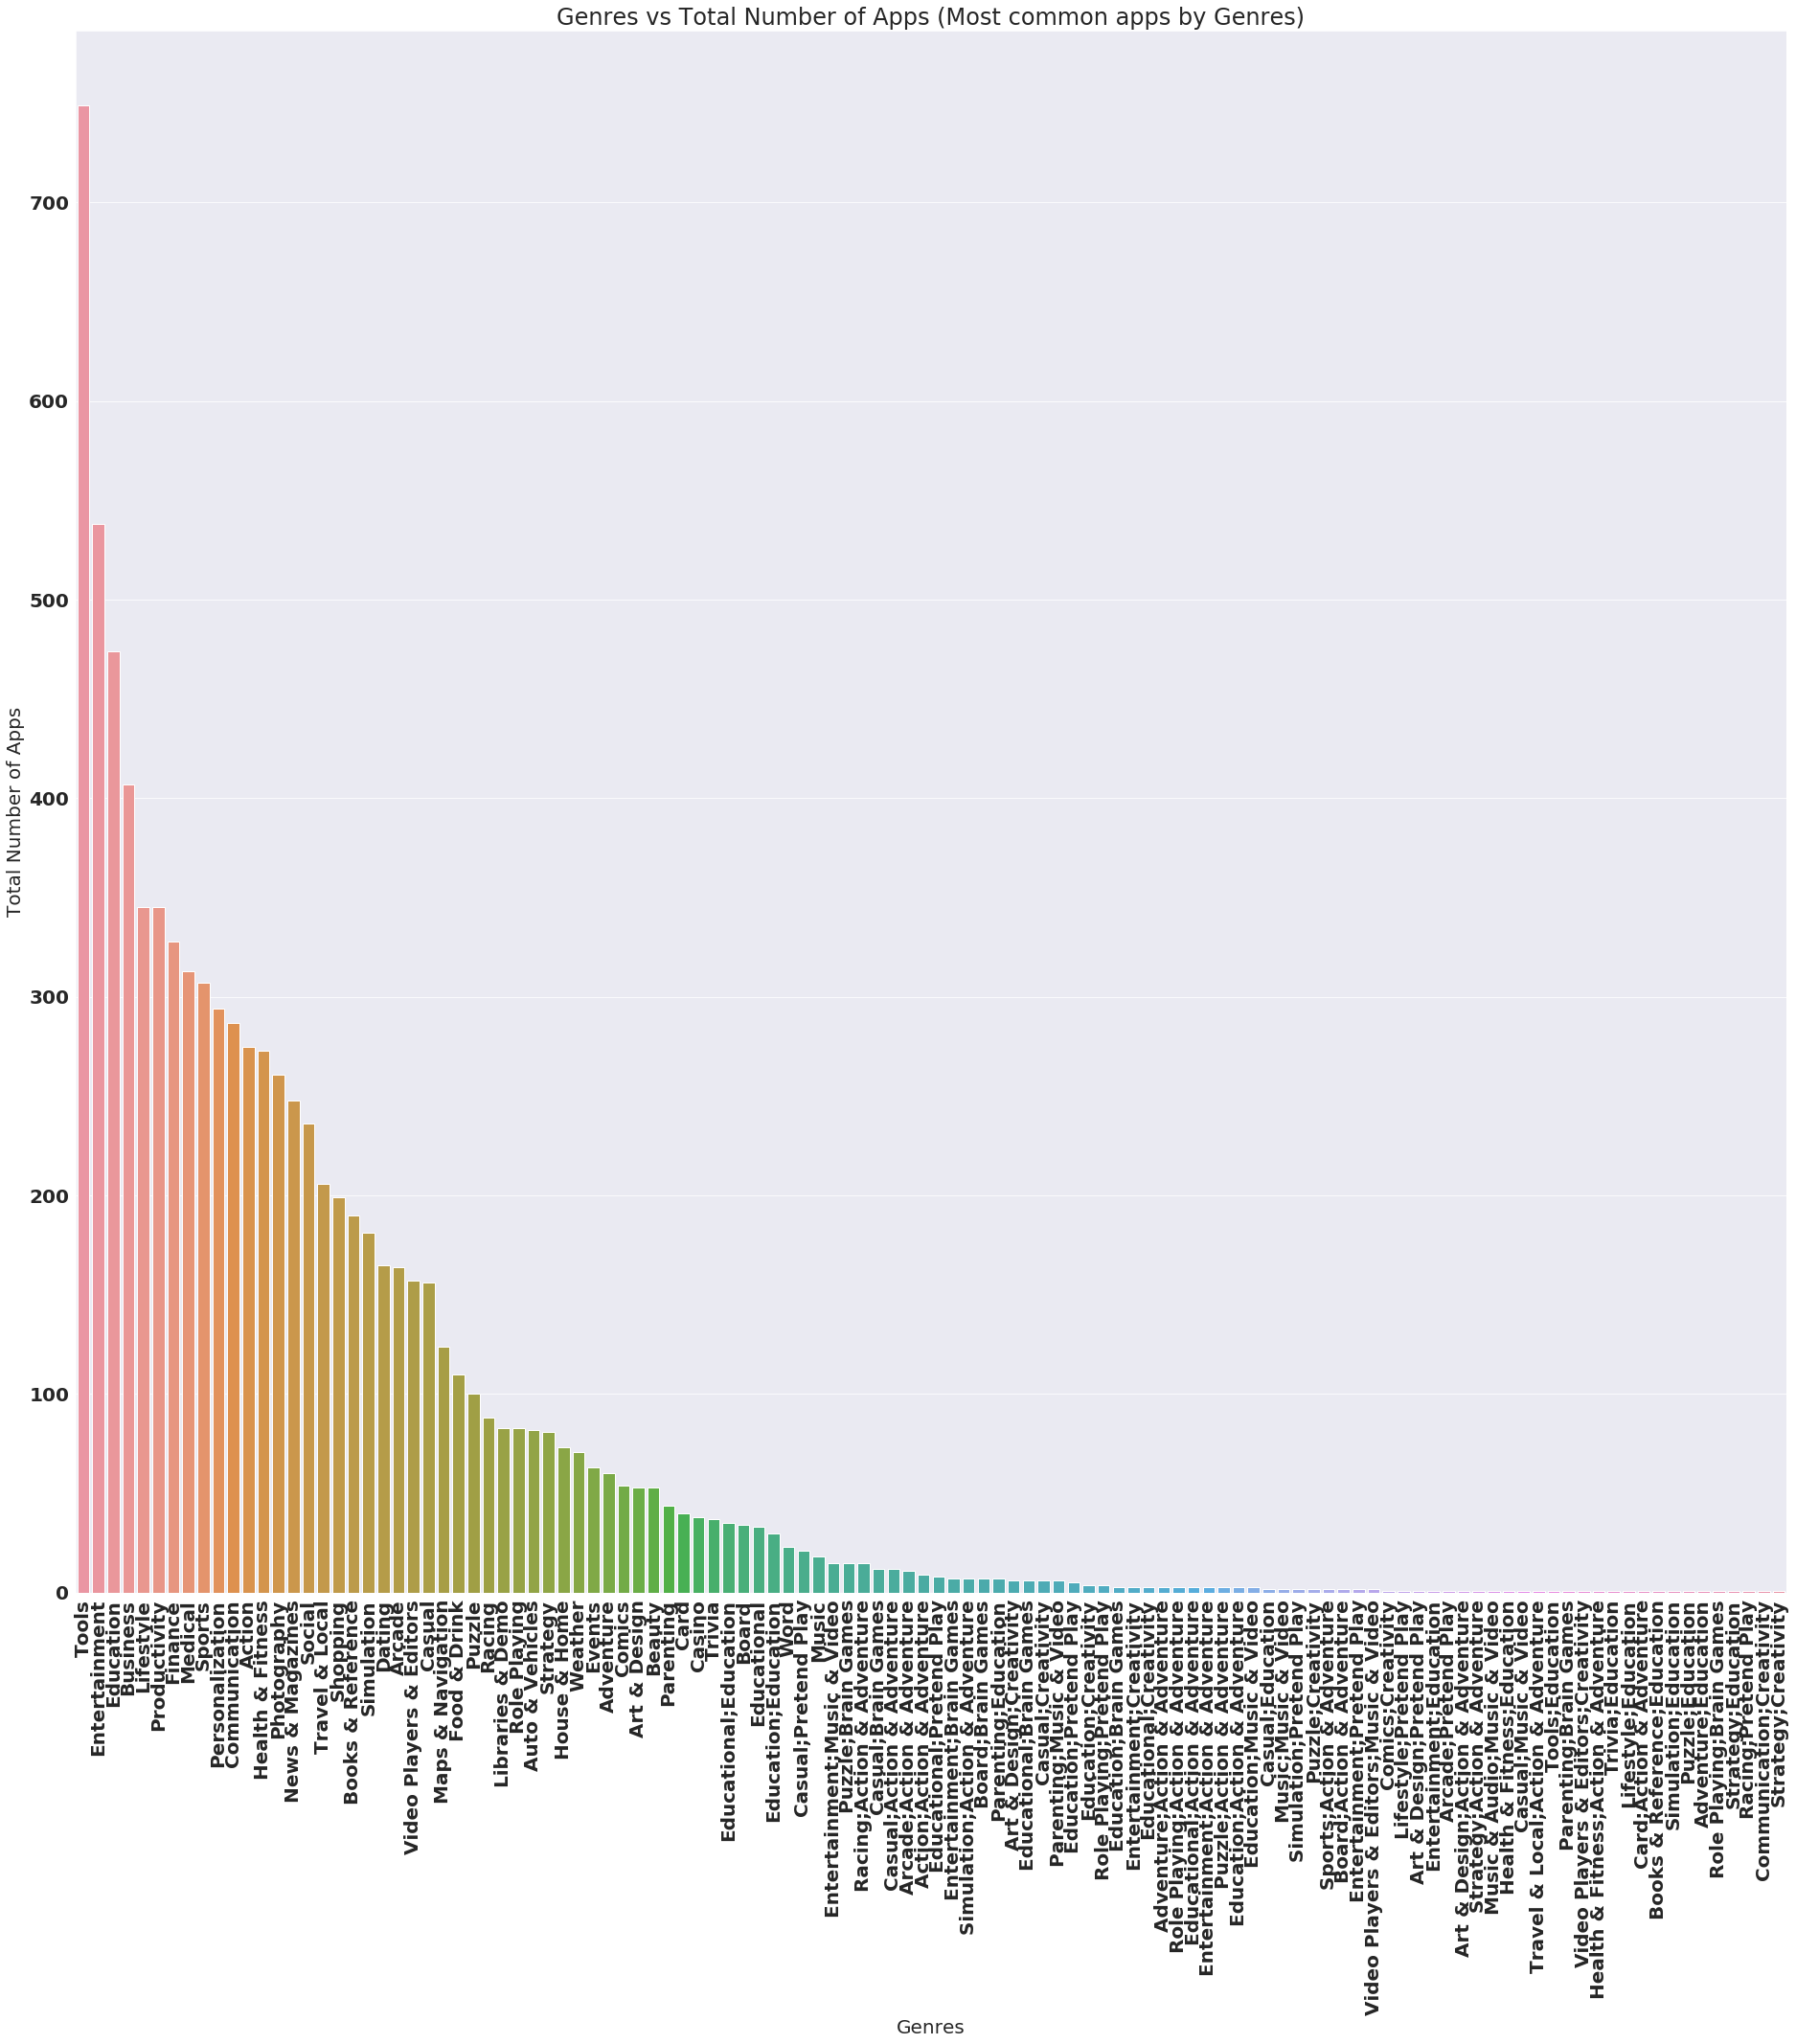

In [72]:
font2 = dict(font)
font2['size'] = 20
rc('font', **font2)
f, ax = plt.subplots(figsize=(32, 30))
fig = sns.barplot(x=x, y=y)
ax.title.set_text("Genres vs Total Number of Apps (Most common apps by Genres)")
ax.set_xlabel("Genres")
ax.set_ylabel("Total Number of Apps")
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Genres_set)), Genres_set_)
print()

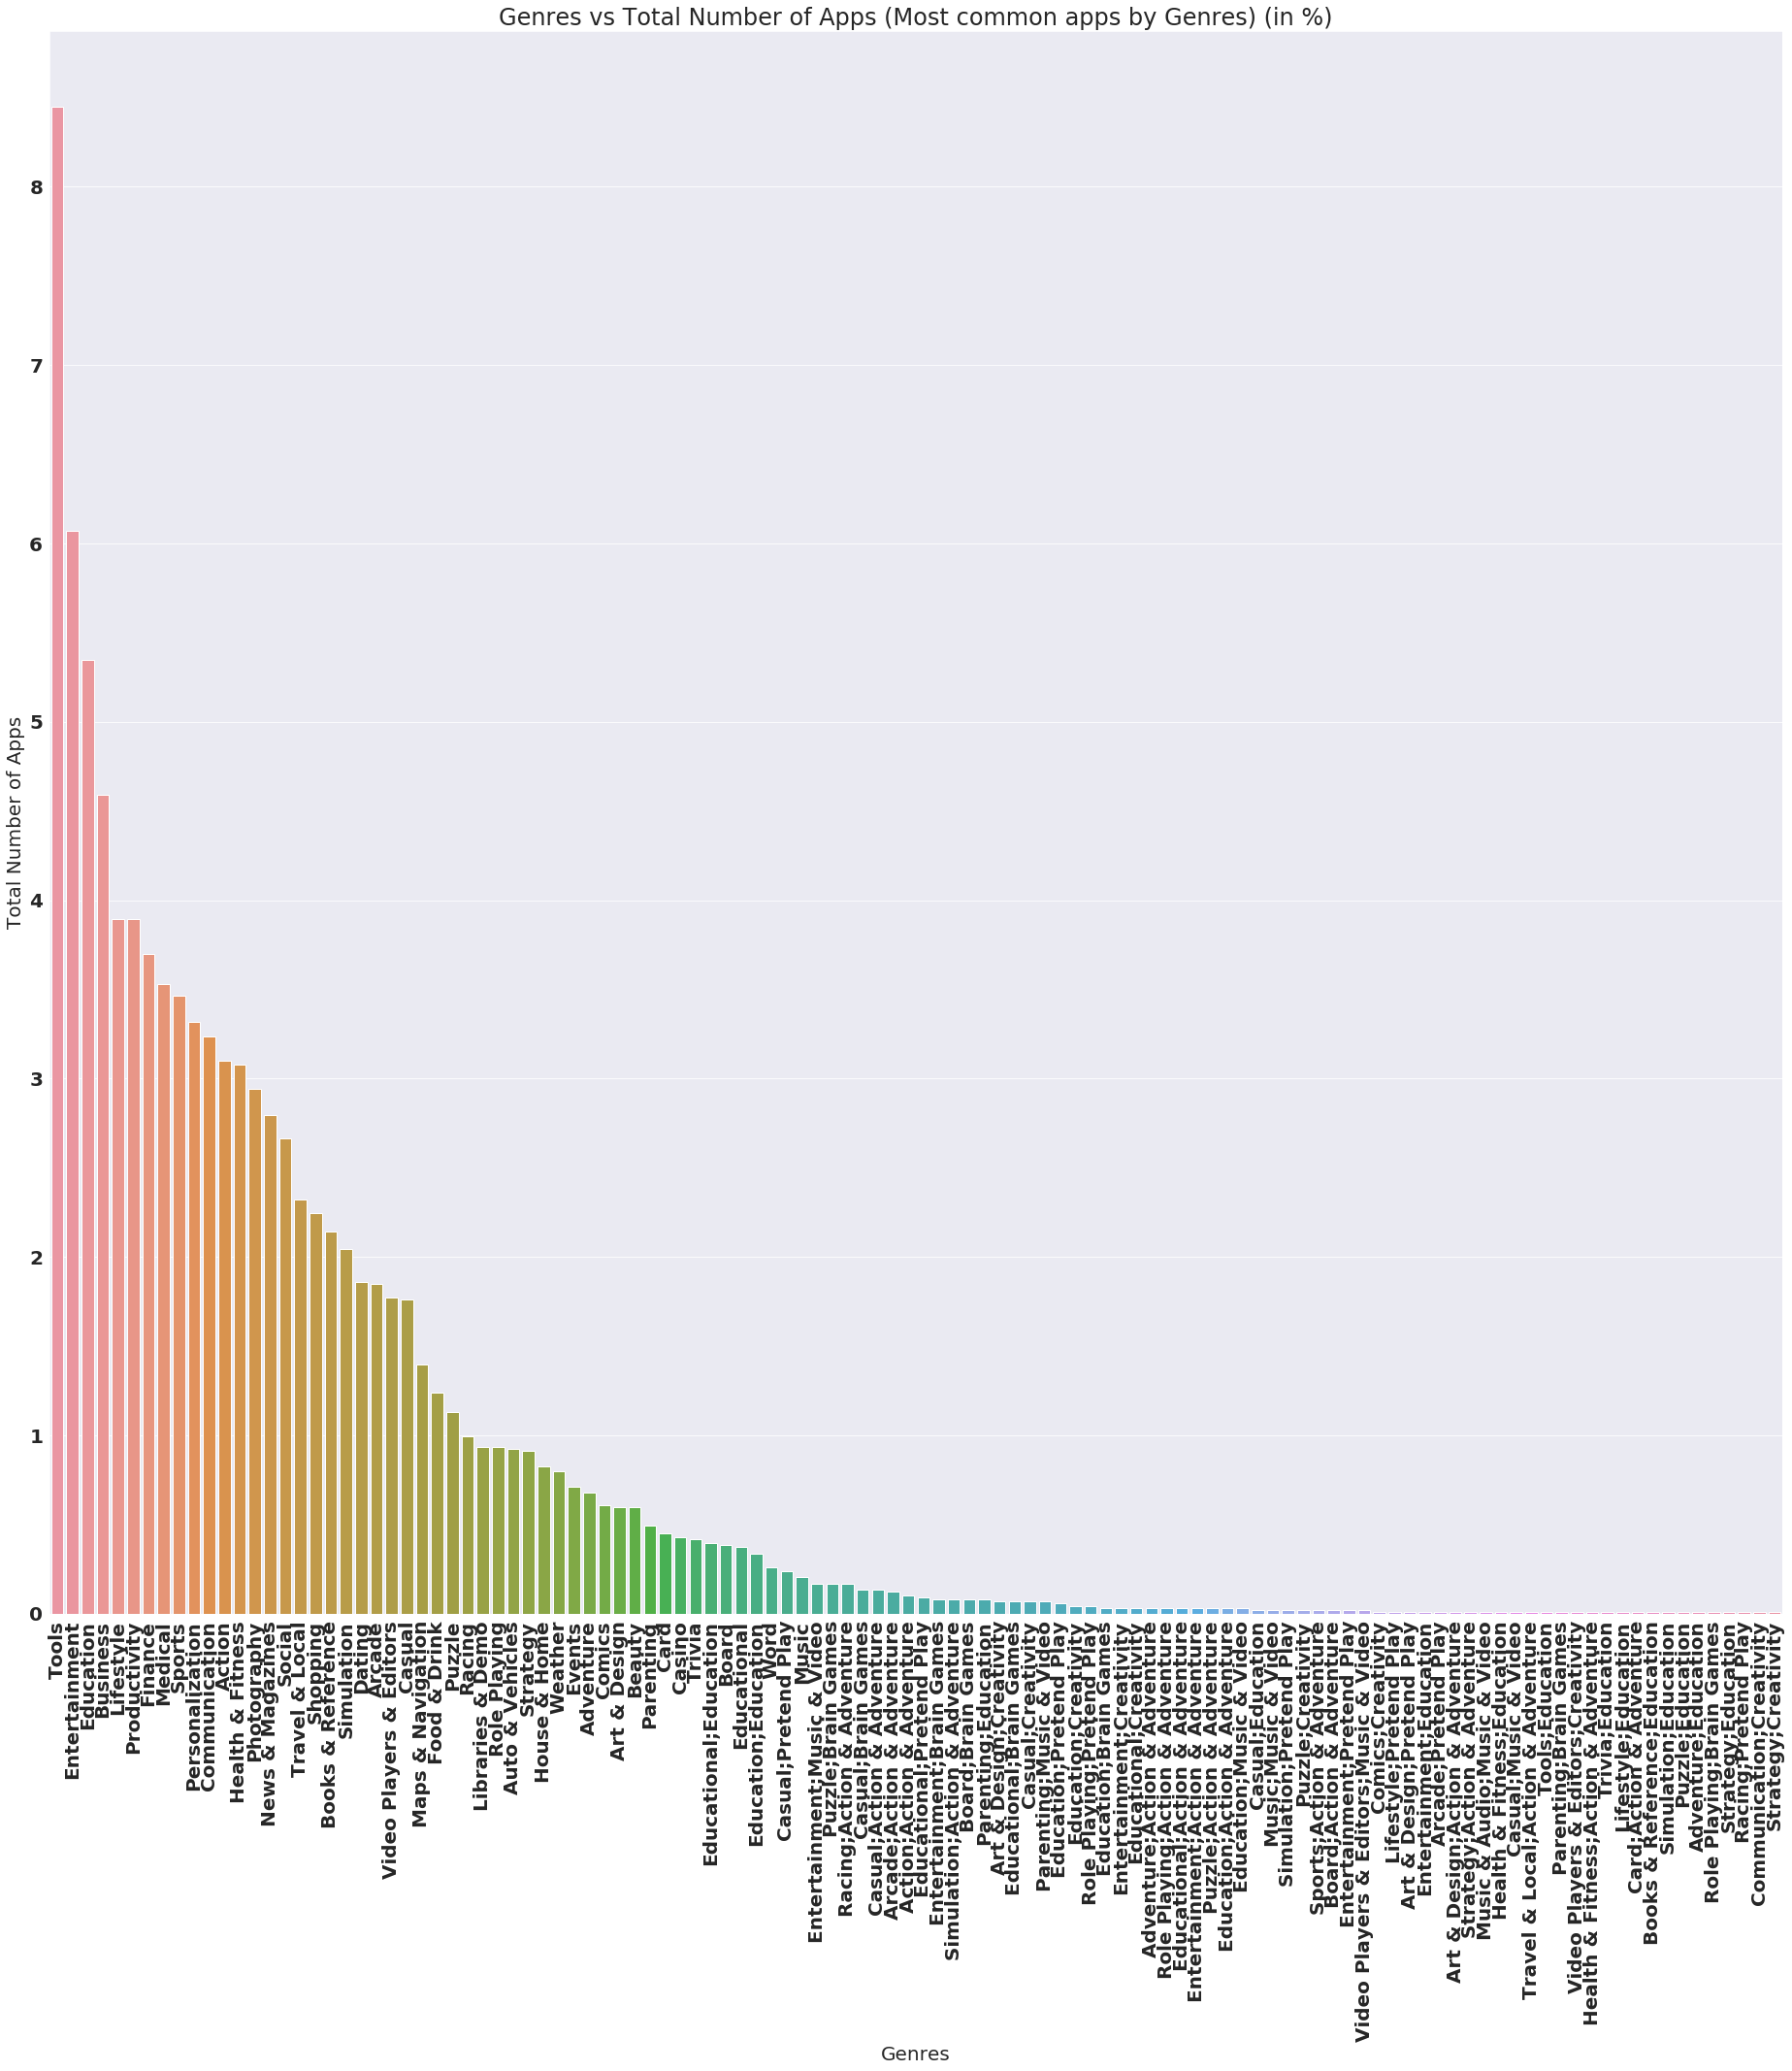

In [73]:
# xs and ys were created above and using it here
y_tmp = []
for i in y:
    y_tmp.append(i/len(train)*100)
font2 = dict(font)
font2['size'] = 20
rc('font', **font2)
f, ax = plt.subplots(figsize=(32, 30))
fig = sns.barplot(x=x, y=y_tmp)
ax.title.set_text("Genres vs Total Number of Apps (Most common apps by Genres) (in %)")
ax.set_xlabel("Genres")
ax.set_ylabel("Total Number of Apps")
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Genres_set)), Genres_set_)
print()

**Most popular apps by genre:**

For that we need to plot bargraph between 'Installs' (y) and 'Genres' (x). But as we can see that installs are not numeric values. So I've converted it into numberic values e.g. "1,000,000+" => 1000000.00 , because it says that the value is greater than 1Million but that can be one less than the next largest one, so for simplicity we are converting it into their respective floats.
Below is the code for  ploting genres vs average number of installers.

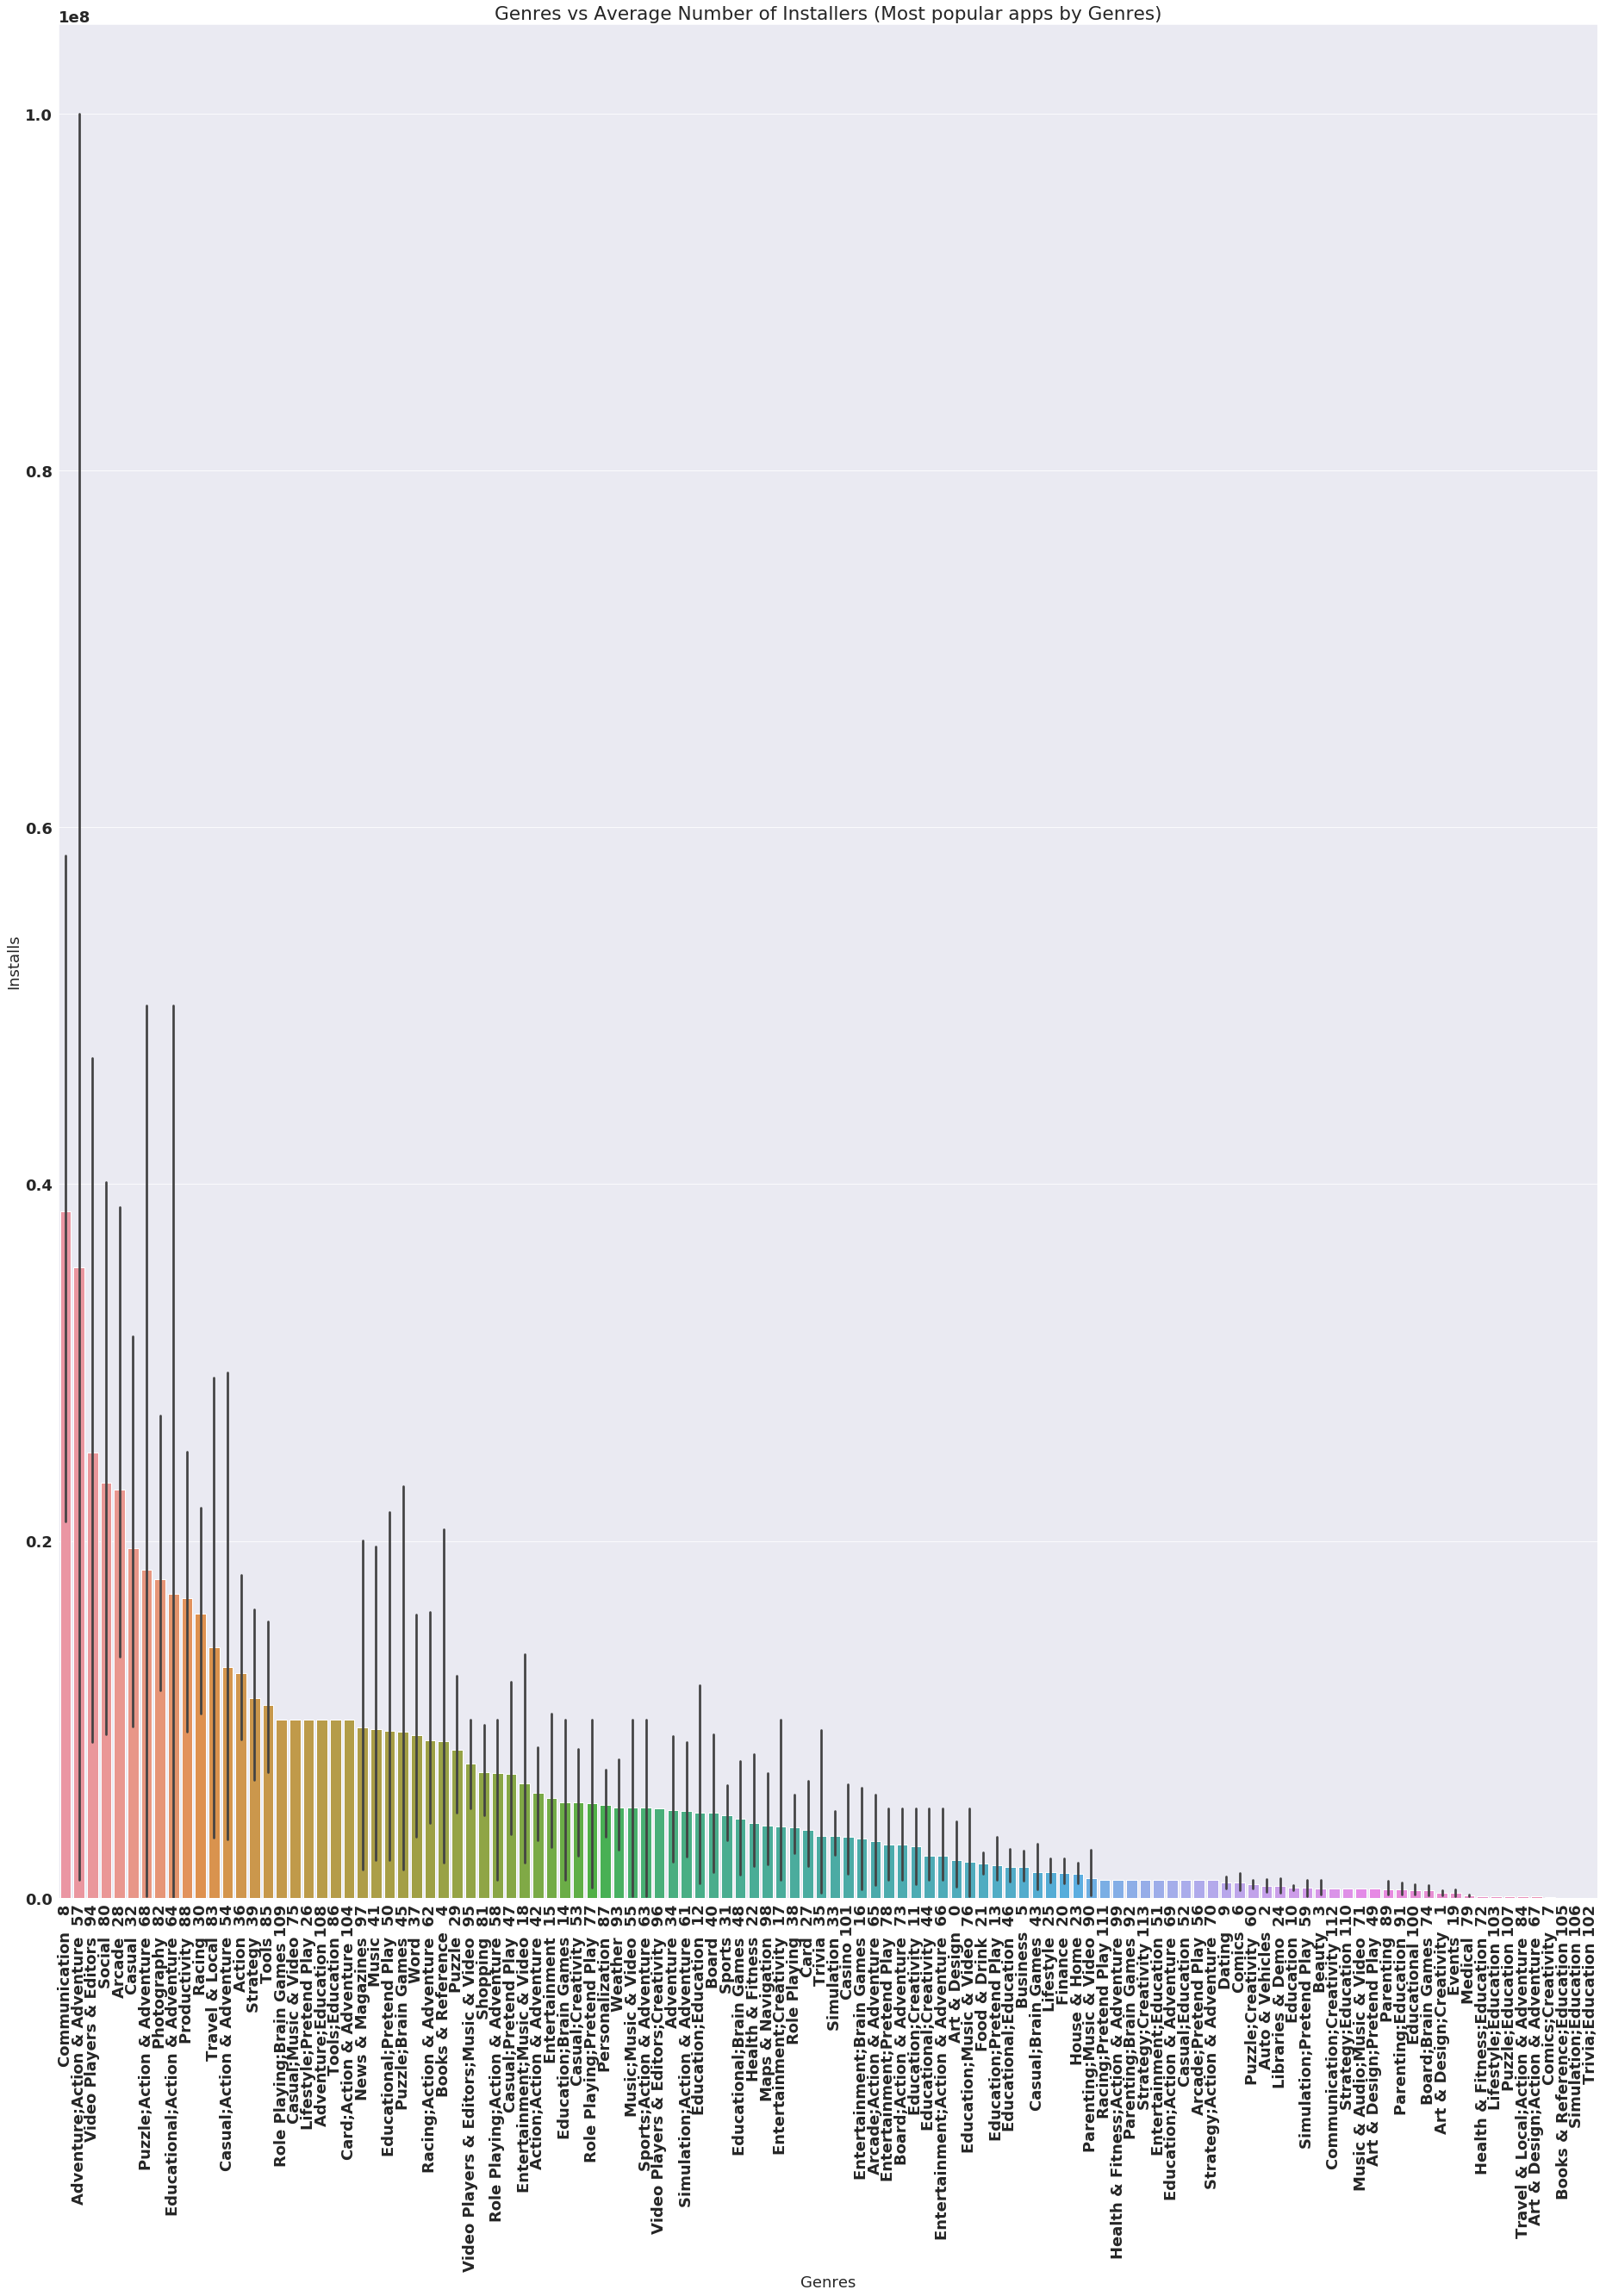

In [74]:
font2 = dict(font)
font2['size'] = 18
rc('font', **font2)
var = 'Genres'
data = pd.concat([train['Installs'].map(lambda x:float(re.sub('[,+]', '', x))), train[var].map(lambda x: Genres_set.index(x))], axis=1)
result = data.groupby([var])['Installs'].aggregate(np.mean).reset_index().sort_values('Installs', ascending=False)
new_mapping = list(result['Genres'])
new_list = []
for i in data['Genres']:
    new_list.append(new_mapping.index(i))
data['Genres'] = new_list
Genres_set_ = []
for i in new_mapping:
    Genres_set_.append(Genres_set[i])
f, ax = plt.subplots(figsize=(32, 40))
ax.title.set_text("Genres vs Average Number of Installers (Most popular apps by Genres)")
fig = sns.barplot(x=var, y="Installs", data=data)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
Genres_set_temp = list(map(lambda x: x +" "*(4-len(str(Genres_set.index(x)))) + str(Genres_set.index(x)), Genres_set_))
plt.xticks(range(len(Genres_set)), Genres_set_temp)
print()

As we can see a similar pattern as we have analyzed in category. But here number of genres are more than the number of categories because some categories are devide into multipla genres, below is an example of 'FITNESS' (HEALTH_AND_FITNESS) and 'GAME' category.

In [75]:
print("Genres of \'FITNESS\' (HEALTH_AND_FITNESS) category:")
for i in Genres_set:
    if 'fitness' in i.lower():
        print("\t", Genres_set.index(i), i)
print("\n\nGenres of \'GAME\'  category")
for i in Genres_set:
    if 'game' in i.lower():
        print("\t", Genres_set.index(i), i)

Genres of 'FITNESS' (HEALTH_AND_FITNESS) category:
	 22 Health & Fitness
	 72 Health & Fitness;Education
	 99 Health & Fitness;Action & Adventure


Genres of 'GAME'  category
	 14 Education;Brain Games
	 16 Entertainment;Brain Games
	 43 Casual;Brain Games
	 45 Puzzle;Brain Games
	 48 Educational;Brain Games
	 74 Board;Brain Games
	 92 Parenting;Brain Games
	 109 Role Playing;Brain Games


In games there more than what we see above, eg. 'Action; Action & Adventure', 'Action', 'Trivia', 'Board', 'Arcade', 'Sports', 'Casual', 'Puzzle' etc. And some genres of FAMILY category is also merged here.

In [76]:
print("Genres of \'COMMUNICATION\' category:")
for i in Genres_set:
    if 'communication' in i.lower():
        print("\t", Genres_set.index(i), i)
print("\n\nGenres of \'TOOLS\'  category")
for i in Genres_set:
    if 'tools' in i.lower():
        print("\t", Genres_set.index(i), i)

Genres of 'COMMUNICATION' category:
	 8 Communication
	 112 Communication;Creativity


Genres of 'TOOLS'  category
	 85 Tools
	 86 Tools;Education


But this division is not the same amongst all the categories. we can see that genres related to game and family category are more than genres related to communication and tools. And their apps division is also inequal. We can see that tools has got maximum apps but tools;education has got a few apps.

For simplicity I've devided the genres into five sets.

* Set1: The most popular genres
* Set2: Highly popular genres
* Set3: Genres having average number of downloads pt.1
* Set4: Genres having average number of downloads pt.2
* Set5: Else part (Negligible downloads)

In [77]:
#From the graph:
selected_set_1 = [8, 28, 30, 32, 54, 57, 64, 68, 80, 82, 83, 88, 94]
selected_set_2 = [4, 26, 29, 36, 37, 39, 41, 45, 50, 62, 75, 85, 86, 97, 104, 108, 109]
selected_set_3 = [12, 14, 15, 17, 18, 22, 31, 34, 38, 40, 42, 47, 48, 53, 55, 58, 61, 63, 81, 87, 93, 94, 95, 96, 98]
selected_set_4 = [11, 27, 33, 35, 65, 66, 73, 76, 77, 78, 101]
#Set 5 is else so not included
print('Set1: Most Downloaded\n')
for i in selected_set_1:
    print(i, Genres_set[i], sep='\t')
print('\nSet2: Higher number of Downloads\n')
for i in selected_set_2:
    print(i, Genres_set[i], sep='\t')
print('\nSet3: Average number of Downloads pt.1\n')
for i in selected_set_3:
    print(i, Genres_set[i], sep='\t')
print('\nSet4: Average number of Downloads pt.2\n')
for i in selected_set_4:
    print(i, Genres_set[i], sep='\t')

Set1: Most Downloaded

8	Communication
28	Arcade
30	Racing
32	Casual
54	Casual;Action & Adventure
57	Adventure;Action & Adventure
64	Educational;Action & Adventure
68	Puzzle;Action & Adventure
80	Social
82	Photography
83	Travel & Local
88	Productivity
94	Video Players & Editors

Set2: Higher number of Downloads

4	Books & Reference
26	Lifestyle;Pretend Play
29	Puzzle
36	Action
37	Word
39	Strategy
41	Music
45	Puzzle;Brain Games
50	Educational;Pretend Play
62	Racing;Action & Adventure
75	Casual;Music & Video
85	Tools
86	Tools;Education
97	News & Magazines
104	Card;Action & Adventure
108	Adventure;Education
109	Role Playing;Brain Games

Set3: Average number of Downloads pt.1

12	Education;Education
14	Education;Brain Games
15	Entertainment
17	Entertainment;Creativity
18	Entertainment;Music & Video
22	Health & Fitness
31	Sports
34	Adventure
38	Role Playing
40	Board
42	Action;Action & Adventure
47	Casual;Pretend Play
48	Educational;Brain Games
53	Casual;Creativity
55	Music;Music & Video
58	

**Conclusion part B:**

Similar trend to the part 1 analisis can be seen here. We can see the set 1 genres in our top 5 categories, and others too. But in all of these, we see a variety of genres related to GAMES and FAMILY in all the four sets. But as we've discussed in the previous part that apps that belongs to set 1 is highly dominated by a fewer apps which increase the average. And due to similar trend. So here the conclusion is the same as part A which is as below: (the most profitable app profiles by genres)

1. Books & Reference
2. Health & Fitness
3. genres related to PHOTOGRAPHY or PRODUCTIVITY or TOOLS or PERSONALIZATION or GAME or FAMILY


**Part 4:** After getting the answers of each features, determine the final answer which is the app profiles that are more profitable (attract more users).
The final answer is again from part A and part B, is as below:

(the most profitable app profiles by genres/category)

1. Books & Reference
2. Health & Fitness
3. genres/category related to PHOTOGRAPHY or PRODUCTIVITY or TOOLS or PERSONALIZATION or GAME or FAMILY

**Conclusion:**

In this project our task was to determine profitable app profiles for the Google Play Market. Here we've done ananlysis of apps that are availale in the Google Play Store and determined the profitable app profiles. 
* In the part 1, we did preprocessing on the dataset to clean the data as the dataset has some problems which are 1. Invalid entries, 2. Duplicates & nan entries, 3. Apps that target local people or specific communities or have language other than English are invalid and can cause more confusion in analysis and 4. Paid apps (We need only free apps because paid apps are more diverse and create more confusion because of the unique features).
* After getting the preprocessed dataset for the analysis(in part 2), we determined the features which are important for analysis which are 'Category' and 'Genres' in the dataset. 
* After getting features which are important for the analysis, we analysed those features more deeply and determined entries that are more acceptable for our final answer which was to determine the entry or entries that attract more users (or that have more downloads). In this part , we devided the process into two parts, part A (for Category) and part B (for Genre).
    * In part A, we have determined most common apps by category, most popular app by category, analyzed top 17 categories.
    * In part B, we have determined most common apps by genre, most popular app by genre, analyzed top all the genres by deviding it into five sets according to their popularity.
* After analyzing 'Category' and 'Genres' features, we determined the final answer which is the app profiles that are more profitable (attract more users) which is as below.
Ans:
Apps which belongs to the category 'BOOKS_AND_REFERENCE' and genre 'Books & Referance' are the apps which are the most profitable to the Google Play Market. In this hierarchy, the second most profitable app profile is category 'HEALTH_AND_FITNESS' and genre 'Health & Fitness', the third most profitable app profile is genres/category related to PHOTOGRAPHY or PRODUCTIVITY or TOOLS or PERSONALIZATION or GAME or FAMILY.
In part 2 we have also discussed about rating, content rating and reviews. In part A of part 3, I've used many times that the app must have uniqueness and people must like their uniqueness in order to have more installers. Combining these two sentences we can also see that uniqueness and people's review can have strong correlation with ratings and reviews. It implies that all of these apps from these categories/genres must have uniqueness and people must like their uniqueness (interesting features) in order to have more installers.
An example can be given as: we create an app which is in category/genre "BOOKS_AND_REFERENCE" that shows us not only books but also takes quizzes and shows quotes. This such app profiles are most profitable for the Google Play Store market.

Hope you enjoyed this analysis! Thank you.